In [20]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df=pd.read_csv('laptop_data.csv')

In [ ]:
df.head()

,Unnamed: 0,Company,TypeName,Inches,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8GB,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37kg,71378.6832
1,1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8GB,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34kg,47895.5232
2,2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8GB,256GB SSD,Intel HD Graphics 620,No OS,1.86kg,30636.0000
3,3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16GB,512GB SSD,AMD Radeon Pro 455,macOS,1.83kg,135195.3360
4,4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8GB,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37kg,96095.8080


In [ ]:
df.shape

(1303, 12)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        1303 non-null   int64  
 1   Company           1303 non-null   object 
 2   TypeName          1303 non-null   object 
 3   Inches            1303 non-null   float64
 4   ScreenResolution  1303 non-null   object 
 5   Cpu               1303 non-null   object 
 6   Ram               1303 non-null   object 
 7   Memory            1303 non-null   object 
 8   Gpu               1303 non-null   object 
 9   OpSys             1303 non-null   object 
 10  Weight            1303 non-null   object 
 11  Price             1303 non-null   float64
dtypes: float64(2), int64(1), object(9)
memory usage: 122.3+ KB


In [ ]:
df.describe()   # 5 number summary

,Unnamed: 0,Inches,Price
count,1303.00000,1303.000000,1303.000000
mean,651.00000,15.017191,59870.042910
std,376.28801,1.426304,37243.201786
min,0.00000,10.100000,9270.720000
25%,325.50000,14.000000,31914.720000
50%,651.00000,15.600000,52054.560000
75%,976.50000,15.600000,79274.246400
max,1302.00000,18.400000,324954.720000


In [ ]:
# checking for the duplicated rows
df.duplicated().sum()
# No two or more than two rows are same.

np.int64(0)

In [ ]:
# checking for any missing value in any column
df.isnull().sum()
# there is no missing value in any column

,0
Unnamed: 0,0
Company,0
TypeName,0
Inches,0
ScreenResolution,0
Cpu,0
Ram,0
Memory,0
Gpu,0
OpSys,0


In [22]:
df.drop(columns=['Unnamed: 0'],inplace=True)

In [23]:
df['Ram']=df['Ram'].str.replace('GB','')
df['Weight']=df['Weight'].str.replace('kg','')
df.rename(columns={'Inches': 'Size'},inplace=True)

In [24]:
df.head()

,Company,TypeName,Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
0,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 2.3GHz,8,128GB SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832
1,Apple,Ultrabook,13.3,1440x900,Intel Core i5 1.8GHz,8,128GB Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232
2,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i5 7200U 2.5GHz,8,256GB SSD,Intel HD Graphics 620,No OS,1.86,30636.0000
3,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.7GHz,16,512GB SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360
4,Apple,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel Core i5 3.1GHz,8,256GB SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080


In [25]:
# Still Ram and Weight are object so we have to change in integer and float resp.
df['Ram']=df['Ram'].astype('int32')
df['Weight']=df['Weight'].astype('float32')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 11 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Size              1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
dtypes: float32(1), float64(2), int32(1), object(7)
memory usage: 101.9+ KB


## EDA

' this gives a (histogram) graph of distribution of price data, we can clearly observe that the histogram is right skewed data means\nmeaning most prices are concentrated towards the lower range (between 0 and 100,000), with a long tail extending towards higher prices (over 100,000).\n The peak of the distribution is between 10,000 and 1,00,000, indicating that a large number of prices fall within this range.'

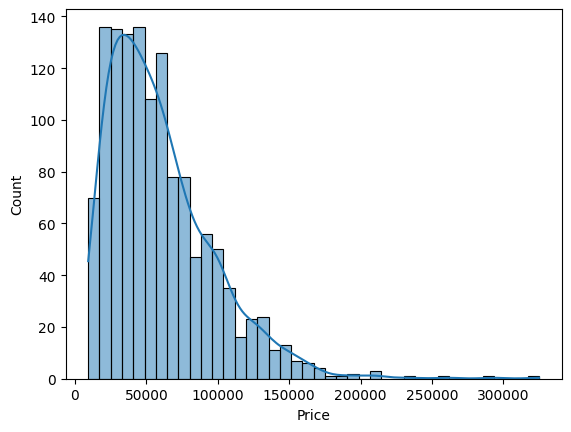

In [ ]:
sns.histplot(df['Price'],bins=40,kde=True)

''' this gives a (histogram) graph of distribution of price data, we can clearly observe that the histogram is right skewed data means
meaning most prices are concentrated towards the lower range (between 0 and 100,000), with a long tail extending towards higher prices (over 100,000).
 The peak of the distribution is between 10,000 and 1,00,000, indicating that a large number of prices fall within this range.'''

/tmp/ipython-input-15-834922981.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Price'])


<Axes: xlabel='Price', ylabel='Density'>

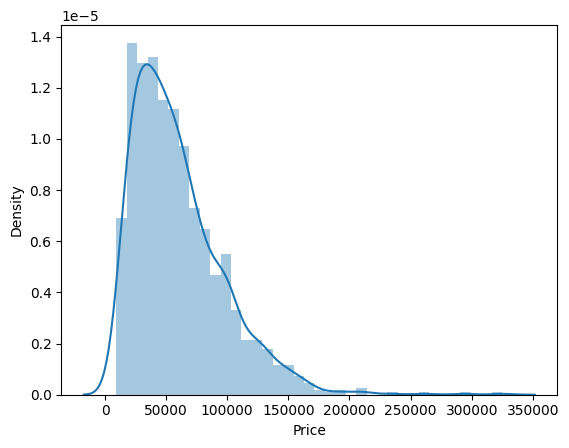

In [ ]:
sns.distplot(df['Price'])

<Axes: xlabel='Price'>

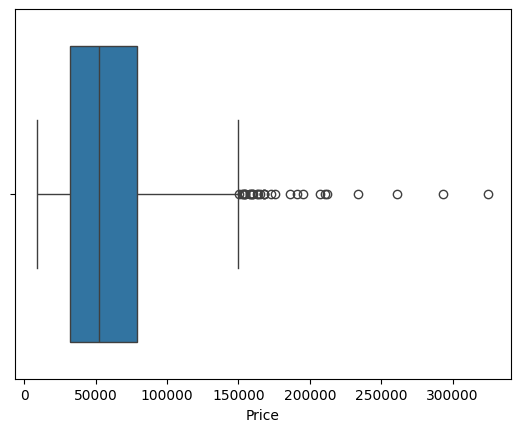

In [ ]:

sns.boxplot(x=df['Price'])

In [ ]:
high_price_laptops = df[df['Price'] >= 150000]
high_price_laptops

,Company,TypeName,Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price
17,Apple,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel Core i7 2.9GHz,16,512GB SSD,AMD Radeon Pro 560,macOS,1.83,152274.2400
190,Lenovo,2 in 1 Convertible,14.0,Touchscreen 2560x1440,Intel Core i7 7500U 2.7GHz,16,1TB SSD,Intel HD Graphics 620,Windows 10,1.42,150462.7200
196,Razer,Gaming,17.3,4K Ultra HD / Touchscreen 3840x2160,Intel Core i7 7820HK 2.9GHz,32,1TB SSD,Nvidia GeForce GTX 1080,Windows 10,3.49,324954.7200
204,Dell,Workstation,15.6,4K Ultra HD 3840x2160,Intel Xeon E3-1505M V6 3GHz,16,256GB SSD + 1TB HDD,Nvidia Quadro M1200,Windows 10,2.80,162770.4000
238,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,32,512GB SSD + 1TB HDD,Nvidia GeForce GTX 1080,Windows 10,4.70,207259.2000
247,Asus,Gaming,17.3,Full HD 1920x1080,Intel Core i7 7820HK 2.9GHz,16,256GB SSD,Nvidia GeForce GTX 1080,Windows 10,3.60,159786.7200
297,Dell,Workstation,17.3,Full HD 1920x1080,Intel Core i7 7820HQ 2.9GHz,16,256GB SSD,Nvidia Quadro M1200,Windows 10,3.42,153705.3408
517,Asus,Gaming,15.6,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,24,512GB SSD,Nvidia GeForce GTX1080,Windows 10,2.24,158135.0400
530,Dell,Gaming,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1070,Windows 10,4.42,160520.3856
563,Lenovo,Notebook,17.3,IPS Panel Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,8,256GB SSD,Nvidia Quadro M620M,Windows 10,3.40,159786.7200


## Gaming and Workstation laptop prices are higher and out of whiskers of box plot.

Company
Dell         297
Lenovo       297
HP           274
Asus         158
Acer         103
MSI           54
Toshiba       48
Apple         21
Samsung        9
Mediacom       7
Razer          7
Microsoft      6
Vero           4
Xiaomi         4
Chuwi          3
Fujitsu        3
Google         3
LG             3
Huawei         2
Name: count, dtype: int64


<Axes: xlabel='Company'>

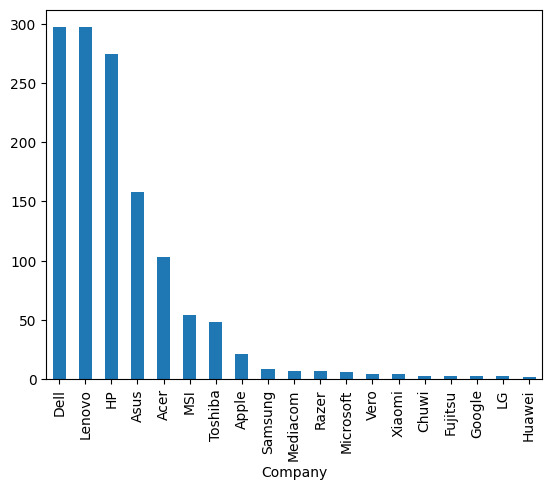

In [ ]:
print(df['Company'].value_counts())
df['Company'].value_counts().plot(kind='bar')

###Dell, Lenovo, and HP dominate the market with a large number of products, indicating their extensive product lines and strong market presence.
###Asus, Acer, MSI, Toshiba, and Apple have a moderate range of products.
### Several smaller brands (like Samsung, Razer, and others) have a limited presence, suggesting they target niche markets or have smaller product portfolios.
### This graph highlights how certain brands, particularly Dell, Lenovo, and HP, offer significantly more products than others, reflecting their market dominance.

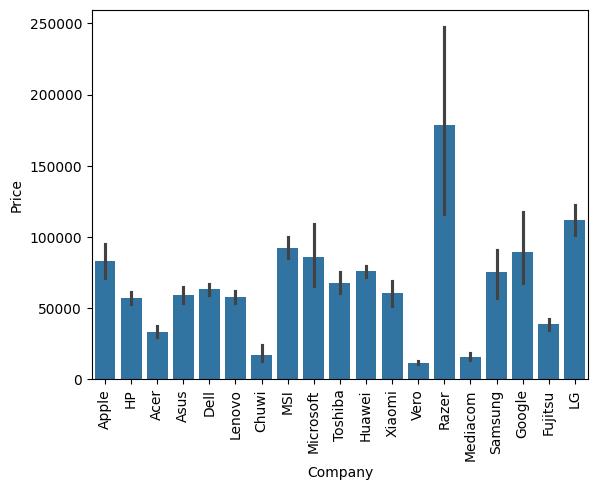

In [ ]:
sns.barplot(x=df['Company'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

In [ ]:
filtered_df =df[df['Company'].isin(['Dell','Lenovo','HP','Asus','Acer','MSI','Toshiba','Apple','Samsung','Razer',
'Mediacom','Microsoft','Xiaomi','Vero','Chuwi','Google','Fujitsu','LG','Huawei'])]

# Group by Company and calculate statistics
result = filtered_df.groupby('Company')['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display the result
print(result)

                  max          min           mean       median           std
Company                                                                     
Acer       138474.720    9270.7200   33394.615969   29783.5200  20015.770207
Apple      152274.240   47895.5232   83340.499886   71378.6832  29923.305164
Asus       211788.000   10224.4320   58830.143878   53946.0000  37428.679547
Chuwi       23922.720   13053.0672   16745.726400   13261.3920   6216.331527
Dell       194972.832   14646.6720   63193.755782   52480.8000  35854.308593
Fujitsu     42570.720   34578.7200   38841.120000   39373.9200   4022.551787
Google     117162.720   67932.0000   89386.080000   83063.5200  25216.998664
HP         233845.920   11135.5200   56891.044222   51495.1200  32900.827893
Huawei      79866.720   71874.7200   75870.720000   75870.7200   5651.197395
LG         122490.720  101178.7200  111834.720000  111834.7200  10656.000000
Lenovo     261018.720   12201.1200   57882.563200   47898.7200  37212.141944

###  here are the conclusions a statistician might draw:

1. **Variation in Price Across Companies:**
Companies like Razer, Asus, and HP have the highest maximum prices, suggesting they offer premium laptops.
Companies like Vero, Fujitsu, and Mediacom have the lowest maximum prices, indicating they target budget-conscious consumers.
2. **Price Stability (Standard Deviation):**
Razer has a high standard deviation (99,100), indicating significant price variation in its offerings, likely due to a wide range of product lines from budget to high-end.
Vero has a low standard deviation (1,546), suggesting consistent pricing with limited variety in models.
3. **Median vs Mean Analysis:**
Companies like Apple and Microsoft have their median prices close to the mean, indicating relatively symmetrical price distributions.
Companies like Asus and HP have medians lower than their means, which may indicate a right-skewed distribution, where a few expensive models pull the mean upwards.
4. **Market Segmentation:**
Razer and Asus focus heavily on high-end gaming or performance laptops due to their high maximum prices and means.
Mediacom, Fujitsu, and Vero cater to the budget segment, as seen in their low mean prices.
5. **Outliers:**
The high standard deviation for Razer and Asus suggests potential outliers in the dataset. High-priced models could significantly affect their statistics.
6. **Diversity in Pricing:**
HP, Lenovo, and Dell have moderate means and medians, suggesting they offer a balanced mix of budget, mid-range, and premium laptops.
7. **Niche vs General Markets:**
Companies like Google and Huawei have narrower ranges of prices (relatively small standard deviation), suggesting they target specific segments of the market (e.g., Chromebooks or premium devices).
**Recommendations:**
For High-End Buyers: Look into brands like Razer, Asus, or HP.
For Budget Buyers: Consider Mediacom, Fujitsu, or Vero.
For Consistent Quality: Companies with lower standard deviations like Vero or Google could be a safer choice for predictable pricing.
These insights could guide decision-making for customers, manufacturers, and market analysts alike.

TypeName
Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: count, dtype: int64


<Axes: xlabel='TypeName'>

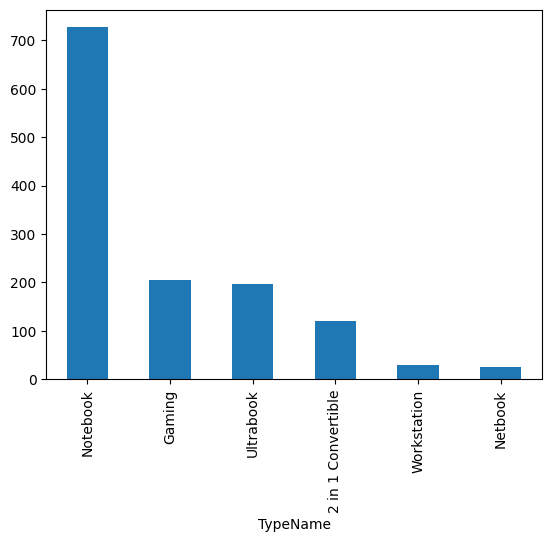

In [ ]:
print(df['TypeName'].value_counts())
df['TypeName'].value_counts().plot(kind='bar')

## Bar graph shows the distribution of different laptop types across several categories.
### 1.) Notebooks dominate the market, with more than 700 occurrences, significantly more than any other category. This indicates that notebooks are the most common and popular laptop type, likely due to their general-purpose usage,budget range(especially for students), affordability, and wide availability.
### 2.) Gaming laptops and Ultrabooks have similar numbers, both around 200 occurrences. Gaming laptops and Ultrabooks are popular for more specialized needs, such as high performance and portability.
### 3.) 2 in 1 Convertibles have a moderate presence, indicating a growing interest in versatile, hybrid devices.
### 4.) Workstations and Netbooks have the smallest shares, catering to more niche or declining markets.

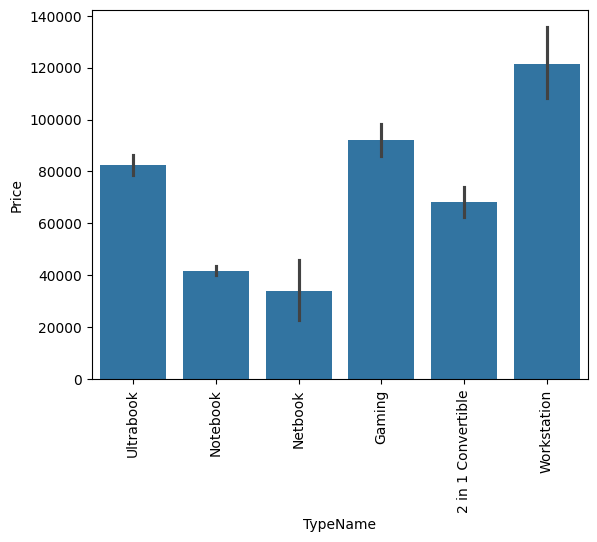

In [ ]:
sns.barplot(x=df['TypeName'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

## This bar graph compares the average prices of different laptop types (TypeName) with error bars showing the price variation (standard deviation).
### Workstations have the highest average price, exceeding 120,000. This is expected as workstations are typically high-performance machines designed for specialized tasks like video editing, 3D rendering, or data science, which require powerful hardware components.

### Ultrabooks and Gaming laptops are both priced around 80,000 to 100,000.Ultrabooks are premium devices that emphasize portability, design, and performance.Gaming laptops require advanced hardware (e.g., high-end GPUs) for gaming, which drives up their price.

### 2 in 1 Convertible laptops, priced at around 70,000, are moderately expensive. These devices offer the versatility of functioning as both laptops and tablets, appealing to users looking for flexible, hybrid devices.

### Notebooks and Netbooks have the lowest average prices, with Notebooks around 50,000. Notebooks are general-purpose devices, while Netbooks are smaller, less powerful laptops designed for lightweight tasks, hence the lower pricing.

In [ ]:
filtered_df =df[df['TypeName'].isin([ 'Notebook', 'Gaming', 'Ultrabook','2 in 1 Convertible', 'Workstation'])]

# Group by Company and calculate statistics
result = filtered_df.groupby('TypeName')['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display the result
print(result)

                          max       min           mean      median  \
TypeName                                                             
2 in 1 Convertible  150462.72  14652.00   68326.360066   63882.720   
Gaming              324954.72  37242.72   92247.960187   79536.384   
Notebook            261018.72  10442.88   41669.149113   36816.480   
Ultrabook           165168.00  26586.72   82489.713429   79866.720   
Workstation         233845.92  72940.32  121497.525683  110017.872   

                             std  
TypeName                          
2 in 1 Convertible  32682.637415  
Gaming              43379.213607  
Notebook            23654.845738  
Ultrabook           26075.362837  
Workstation         37969.647335  


### Here are the conclusions a statistician might draw from this data :

**1. Price Range by Laptop Type:**
Gaming laptops have the widest price range, with the highest maximum price (₹3,24,954.72) and a significant gap between the maximum and minimum, showing that gaming laptops vary greatly in price.
Notebooks are the most affordable, with the lowest average price (₹41,669.15) and the smallest minimum price (₹10,442.88), making them ideal for budget-conscious buyers.
Workstations are the most expensive on average (₹1,21,497.53), reflecting their specialized, high-performance use cases.

**2. Price Consistency:**
Ultrabooks have a smaller standard deviation (₹26,075.36), indicating their prices are relatively consistent, catering to a specific audience (likely professionals).
Notebooks also have lower price variability, emphasizing affordability and a narrow focus on budget and mid-range options.
Gaming laptops have the highest standard deviation (₹43,379.21), showing that prices vary a lot depending on specs and brand.

**3. Target Audience:**
2-in-1 Convertibles and Ultrabooks are priced higher on average, targeting professionals or users looking for premium features like portability and versatility.
Notebooks are ideal for general-purpose users with limited budgets.
Workstations cater to niche markets like engineers, designers, or data scientists who need high-performance machines.

**4. Median vs Mean:**
For most laptop types, the median price is slightly lower than the mean price, suggesting a few expensive models pull the average price higher.
Summary:

***Budget Buyers:*** Look for Notebooks for the best value.

***Professionals:*** Consider Ultrabooks or 2-in-
1 Convertibles for portability and high-end features.

***Gamers:*** Be ready to pay more for Gaming laptops, but know they vary widely in price.

***Power Users:*** Opt for Workstations, but expect a higher price tag due to their performance focus.

This data highlights how different laptop types cater to specific user needs and budgets, with notable price differences based on features and functionality.

Size
15.6    665
14.0    197
13.3    164
17.3    164
12.5     39
11.6     33
13.5      6
12.0      6
13.9      6
12.3      5
10.1      4
15.4      4
15.0      4
13.0      2
18.4      1
17.0      1
14.1      1
11.3      1
Name: count, dtype: int64


<Axes: xlabel='Size'>

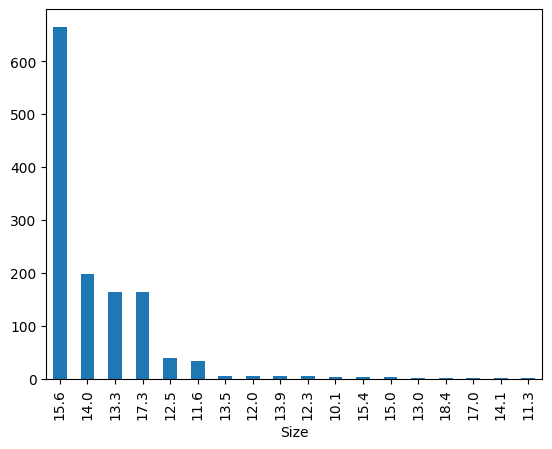

In [ ]:
print(df['Size'].value_counts())
df['Size'].value_counts().plot(kind='bar')

#### Maximum laptops are of size 15.6 inches i.e. 665.
 #### Laptops having size of 17.3, 13.3, 14 inches have 164 & 197 resp.
 #### And laptops having different size vary from 1 to 50.

<Axes: xlabel='Size', ylabel='Count'>

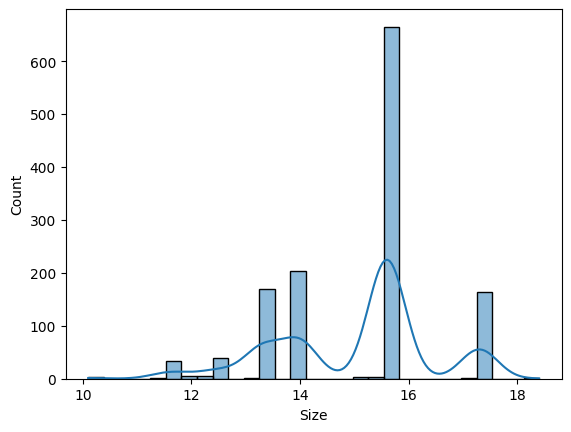

In [ ]:
sns.histplot(df['Size'],kde=True)

/tmp/ipython-input-26-4193263666.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Size'])


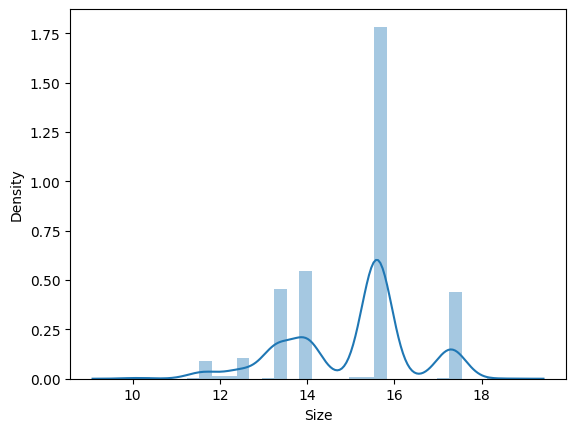

In [ ]:
sns.distplot(df['Size'])
plt.show()

<Axes: xlabel='Size', ylabel='Price'>

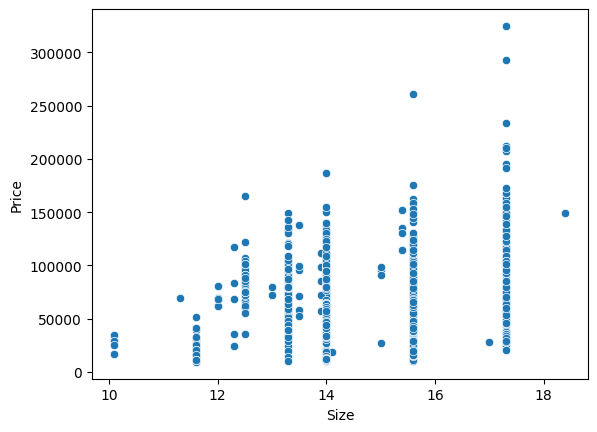

In [ ]:
sns.scatterplot(x=df['Size'],y=df['Price'])

### 1.) Positive Correlation: There's a noticeable upward trend in prices as the size of the laptop increases.

### 2.) Price Variability: Laptops in the 13 to 15-inch range show a wide range of prices. This suggests that there are various models within this size range, including both budget and premium options.

### 3.) Larger Sizes (16 to 18 inches): Laptops(mainly gaming laptops or workstations) with screen sizes around 16 inches and above appear to have generally higher prices, with many exceeding 150,000.

### 4.) Smaller Sizes (10-12 inches): Smaller laptops (below 13 inches) are generally lower priced. These are likely netbooks or ultraportables


In [ ]:
df['ScreenResolution'].value_counts()

,count
ScreenResolution,
Full HD 1920x1080,507
1366x768,281
IPS Panel Full HD 1920x1080,230
IPS Panel Full HD / Touchscreen 1920x1080,53
Full HD / Touchscreen 1920x1080,47
1600x900,23
Touchscreen 1366x768,16
Quad HD+ / Touchscreen 3200x1800,15
IPS Panel 4K Ultra HD 3840x2160,12


# Feature Engineering

In [26]:
df['Touchscreen'] = df['ScreenResolution'].apply(lambda x:1 if 'Touchscreen' in x else 0)

In [27]:
df['Touchscreen'].value_counts()

,count
Touchscreen,
0,1111
1,192


### There are 1111 (85.3%) touchscreen and 192 (14.7%) non-touchscreen laptops

<Axes: ylabel='count'>

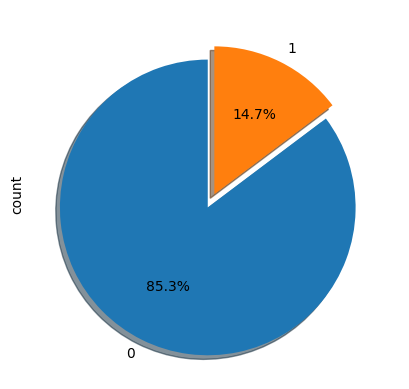

In [28]:
df['Touchscreen'].value_counts().plot(kind='pie',
                                      autopct='%1.1f%%',  # Display percentages
                                      explode=[0.1, 0] ,    # Explode first slice
                                      shadow=True,                # Add shadow for better aesthetics
                                      startangle=90 )             # Start the pie chart at 90 degrees

<Axes: xlabel='Touchscreen', ylabel='Price'>

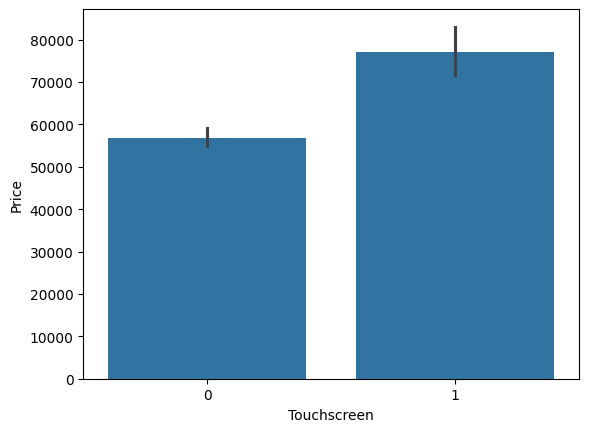

In [ ]:
sns.barplot(x=df['Touchscreen'],y=df['Price'])

In [ ]:
non_touchscreen_stats = df[df['Touchscreen'] == 0]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
touchscreen_stats = df[df['Touchscreen'] == 1]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display results

print("Laptops without Touchscreen:")
print(non_touchscreen_stats)

print("\nLaptops with Touchscreen:")
print(touchscreen_stats)

Laptops without Touchscreen:
max       261018.720000
min         9270.720000
mean       56910.518862
median     48964.320000
std        35638.784525
Name: Price, dtype: float64

Laptops with Touchscreen:
max       324954.720000
min        14652.000000
mean       76995.205500
median     74538.720000
std        41570.696128
Name: Price, dtype: float64


### On an average the price of touchscreen laptops are higher than non-touchscreen laptops.

In [29]:
df['IPS'] = df['ScreenResolution'].apply(lambda x:1 if 'IPS' in x else 0)

In [30]:
df['IPS'].value_counts()

,count
IPS,
0,938
1,365


### There are 365 (28%) IPS displAy laptops and 938 (72%) non-IPS display laptops.

<Axes: ylabel='count'>

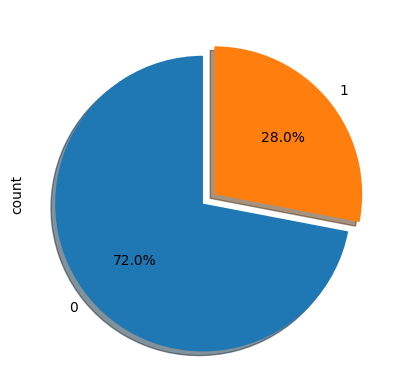

In [ ]:
df['IPS'].value_counts().plot(kind='pie',
                                      autopct='%1.1f%%',
                                      explode=[0.1, 0] ,
                                      shadow=True,
                                      startangle=90 )

<Axes: xlabel='IPS', ylabel='Price'>

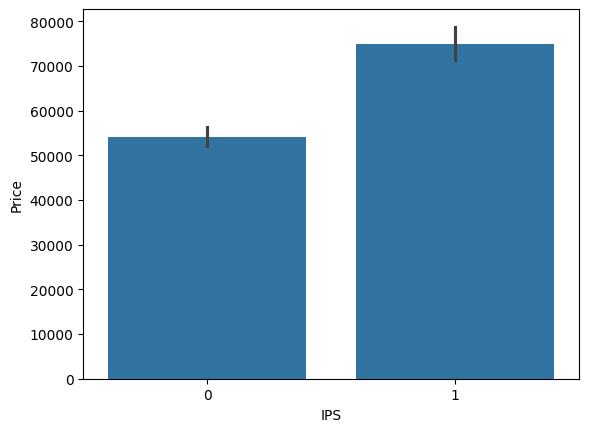

In [ ]:
sns.barplot(x=df['IPS'],y=df['Price'])

In [31]:
non_ips_stats = df[df['IPS'] == 0]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
ips_stats = df[df['IPS'] == 1]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display results
print("Laptops without IPS:")
print(non_ips_stats)

print("\nLaptops with IPS:")
print(ips_stats)

Laptops without IPS:
max       324954.720000
min         9270.720000
mean       54012.931154
median     45168.120000
std        35070.700104
Name: Price, dtype: float64

Laptops with IPS:
max       261018.720000
min        13586.400000
mean       74922.017780
median     67132.800000
std        38466.704594
Name: Price, dtype: float64


### On an average Laptops with IPS displays tend to have higher prices compared to laptops without IPS displays. This could be due to the enhanced display quality and viewing angles.

In [32]:
new = df['ScreenResolution'].str.split('x',n=1,expand=True)
new

,0,1
0,IPS Panel Retina Display 2560,1600
1,1440,900
2,Full HD 1920,1080
3,IPS Panel Retina Display 2880,1800
4,IPS Panel Retina Display 2560,1600
...,...,...
1298,IPS Panel Full HD / Touchscreen 1920,1080
1299,IPS Panel Quad HD+ / Touchscreen 3200,1800
1300,1366,768
1301,1366,768


In [33]:
df['X_res'] = new[0]
df['Y_res'] = new[1]

In [ ]:
df.sample(5)

,Company,TypeName,Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
110,Asus,Ultrabook,15.6,Full HD 1920x1080,Intel Core i7 8550U 1.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce MX150,Windows 10,1.50,67239.36,0,0,Full HD 1920,1080
474,Asus,Notebook,15.6,IPS Panel 4K Ultra HD 3840x2160,Intel Core i7 6700HQ 2.6GHz,12,128GB SSD + 1TB HDD,Intel HD Graphics 530,Windows 10,2.06,69210.72,0,1,IPS Panel 4K Ultra HD 3840,2160
523,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,128GB SSD,Intel HD Graphics 520,Windows 10,1.63,36709.92,0,0,1366,768
600,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i7 7500U 2.7GHz,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.84,64948.32,0,0,Full HD 1920,1080
759,Acer,Notebook,15.6,1366x768,Intel Core i5 7200U 2.5GHz,4,256GB SSD,Intel HD Graphics 620,Windows 10,2.10,31914.72,0,0,1366,768


In [34]:
df['X_res'] = df['X_res'].str.replace(',','').str.findall(r'(\d+\.?\d+)').apply(lambda x:x[0])
df['X_res']

,X_res
0,2560
1,1440
2,1920
3,2880
4,2560
...,...
1298,1920
1299,3200
1300,1366
1301,1366


In [35]:
df['X_res'] = df['X_res'].astype('int')
df['Y_res'] = df['Y_res'].astype('int')
df['Y_res']

,Y_res
0,1600
1,900
2,1080
3,1800
4,1600
...,...
1298,1080
1299,1800
1300,768
1301,768


In [ ]:
df.sample(5)

,Company,TypeName,Size,ScreenResolution,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,X_res,Y_res
782,Toshiba,Ultrabook,14.0,IPS Panel Full HD 1920x1080,Intel Core i7 6600U 2.6GHz,16,512GB SSD,Nvidia GeForce 930M,Windows 10,1.47,93985.9200,0,1,1920,1080
747,HP,Notebook,15.6,Full HD 1920x1080,Intel Core i3 6006U 2GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,1.86,28717.9200,0,0,1920,1080
778,Razer,Gaming,14.0,Full HD 1920x1080,Intel Core i7 7700HQ 2.8GHz,16,512GB SSD,Nvidia GeForce GTX 1060,Windows 10,1.95,154458.7200,0,0,1920,1080
943,Toshiba,Notebook,15.6,1366x768,Intel Core i5 6200U 2.3GHz,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.20,59620.3200,0,0,1366,768
1091,HP,Notebook,15.6,1366x768,Intel Core i3 6006U 2GHz,4,1TB HDD,Intel HD Graphics 520,No OS,1.86,18434.3472,0,0,1366,768


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1303 entries, 0 to 1302
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Company           1303 non-null   object 
 1   TypeName          1303 non-null   object 
 2   Size              1303 non-null   float64
 3   ScreenResolution  1303 non-null   object 
 4   Cpu               1303 non-null   object 
 5   Ram               1303 non-null   int32  
 6   Memory            1303 non-null   object 
 7   Gpu               1303 non-null   object 
 8   OpSys             1303 non-null   object 
 9   Weight            1303 non-null   float32
 10  Price             1303 non-null   float64
 11  Touchscreen       1303 non-null   int64  
 12  IPS               1303 non-null   int64  
 13  X_res             1303 non-null   int64  
 14  Y_res             1303 non-null   int64  
dtypes: float32(1), float64(2), int32(1), int64(4), object(7)
memory usage: 142.6+ KB


In [36]:
# Select only numeric columns and then calculate the correlation
numeric_df = df.select_dtypes(include=['float', 'int'])
price_corr = numeric_df.corr()['Price']
print(price_corr)

Size           0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
Name: Price, dtype: float64


### there is a positive correlation between X_res/Y_res and  price.

In [37]:
df['PPI'] = (((df['X_res']**2) + (df['Y_res']**2))**0.5/df['Size']).astype('float')

In [38]:
numeric_df = df.select_dtypes(include=['float', 'int'])
price_corr = numeric_df.corr()['Price']
print(price_corr)

Size           0.068197
Ram            0.743007
Weight         0.210370
Price          1.000000
Touchscreen    0.191226
IPS            0.252208
X_res          0.556529
Y_res          0.552809
PPI            0.473487
Name: Price, dtype: float64


## we created a new column i.e. PPI with the help of ScreenResolution, X_res and Y_res columns and we can see that there is a positive correlation b/w PPI and price of Laptops.

### Now, we don't need that much of ScreenResolution, X_res and Y_res columns,so we will drop these three columns.

In [39]:
df.drop(columns=['ScreenResolution'],inplace=True)

In [40]:
df.drop(columns=['Size','X_res','Y_res'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI
119,Asus,Notebook,Intel Core i7 8550U 1.8GHz,8,256GB SSD,Nvidia GeForce 940MX,Windows 10,1.70,59567.0400,0,0,141.211998
869,Dell,Workstation,Intel Core i7 7700HQ 2.8GHz,8,1TB HDD,Nvidia Quadro M620,Windows 10,2.23,94731.8400,0,0,141.211998
324,Acer,Notebook,AMD A12-Series 9720P 2.7GHz,8,256GB SSD,AMD Radeon RX 540,Windows 10,2.20,35111.5200,0,0,100.454670
165,MSI,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1060,Windows 10,2.40,95850.7200,0,1,141.211998
1048,Lenovo,Gaming,Intel Core i7 6700HQ 2.6GHz,16,128GB SSD + 1TB HDD,Nvidia GeForce GTX 980M,Windows 10,4.60,122010.6672,0,1,127.335675


In [ ]:
df['Cpu'].value_counts()

,count
Cpu,
Intel Core i5 7200U 2.5GHz,190
Intel Core i7 7700HQ 2.8GHz,146
Intel Core i7 7500U 2.7GHz,134
Intel Core i7 8550U 1.8GHz,73
Intel Core i5 8250U 1.6GHz,72
...,...
Intel Core i5 7200U 2.70GHz,1
Intel Core M M7-6Y75 1.2GHz,1
Intel Core M 6Y54 1.1GHz,1


In [41]:
df['Cpu Name'] = df['Cpu'].apply(lambda x:" ".join(x.split()[0:3]))

In [42]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name
125,HP,Notebook,Intel Celeron Dual Core N3060 1.6GHz,4,500GB HDD,Intel HD Graphics 400,No OS,1.86,13799.52,0,0,100.454670,Intel Celeron Dual
503,Lenovo,Notebook,Intel Celeron Dual Core N3350 1.1GHz,4,500GB HDD,Intel HD Graphics 500,Windows 10,2.10,15930.72,0,0,111.935204,Intel Celeron Dual
486,Dell,Workstation,Intel Core i7 6820HQ 2.7GHz,16,512GB SSD,Nvidia Quadro M620,Windows 10,2.17,124568.64,0,1,141.211998,Intel Core i7
1224,Dell,2 in 1 Convertible,Intel Core i3 7100U 2.4GHz,4,500GB HDD,Intel HD Graphics 620,Windows 10,2.08,27119.52,1,0,146.860478,Intel Core i3
454,Dell,Notebook,Intel Core i7 8550U 1.8GHz,8,128GB SSD + 1TB HDD,AMD Radeon 530,Windows 10,2.36,52161.12,0,0,141.211998,Intel Core i7


In [43]:
def fetch_processor(text):
    if text == 'Intel Core i7' or text == 'Intel Core i5' or text == 'Intel Core i3':
        return text
    else:
        if text.split()[0] == 'Intel':
            return 'Other Intel Processor'
        else:
            return 'AMD Processor'

In [44]:
df['Cpu brand'] = df['Cpu Name'].apply(fetch_processor)

In [ ]:
df.sample(5)

,Company,TypeName,Cpu,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu Name,Cpu brand
1095,Acer,Notebook,Intel Core i5 7200U 2.5GHz,8,256GB SSD + 1TB HDD,Nvidia GeForce GTX 950M,Windows 10,2.40,42570.7200,0,0,141.211998,Intel Core i5,Intel Core i5
11,HP,Notebook,Intel Core i3 6006U 2GHz,4,500GB HDD,Intel HD Graphics 520,No OS,1.86,18381.0672,0,0,141.211998,Intel Core i3,Intel Core i3
1227,Dell,Notebook,Intel Core i5 7200U 2.5GHz,4,1TB HDD,Intel HD Graphics 520,Linux,2.18,27804.7008,0,0,100.454670,Intel Core i5,Intel Core i5
391,Asus,Gaming,Intel Core i7 7700HQ 2.8GHz,16,256GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,3.00,84768.4800,0,0,127.335675,Intel Core i7,Intel Core i7
710,Lenovo,Gaming,Intel Core i7 7700HQ 2.8GHz,8,128GB SSD + 1TB HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,66546.7200,0,1,141.211998,Intel Core i7,Intel Core i7


In [ ]:
df['Cpu brand'].value_counts()

,count
Cpu brand,
Intel Core i7,527
Intel Core i5,423
Other Intel Processor,154
Intel Core i3,136
AMD Processor,63


###  Intel CPUs, with Intel Core i7 (527 or 40%) and Intel Core i5 (423 or 32%) being the most popular choices, suggesting a focus on mid- to high-performance machines (gaming or business). Other Intel processors (154 or 12%) and Intel Core i3 (136 or 10%) are less represented, indicating lower demand for entry-level or less common Intel models. AMD processors are significantly underrepresented (63 or 5%), possibly showing a market preference for Intel or a dataset bias. The data highlights Intel's dominance in this segment, with limited competition from AMD.

<Axes: xlabel='Cpu brand'>

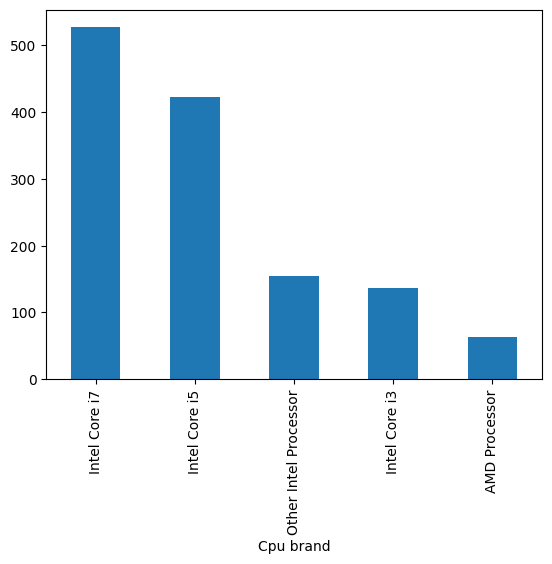

In [ ]:
df['Cpu brand'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

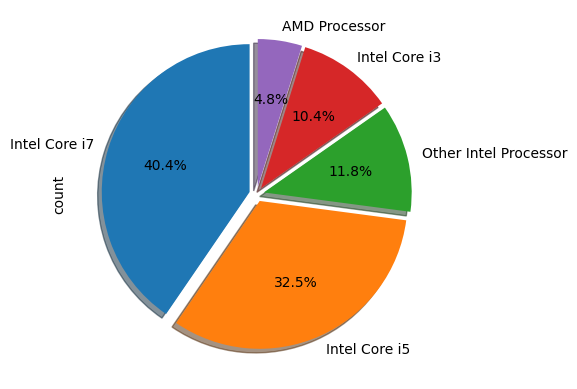

In [ ]:
df['Cpu brand'].value_counts().plot(kind='pie',
                                      autopct='%1.1f%%',
                                      explode=[0.05, 0.05, 0.05, 0.05, 0.05] ,
                                      shadow=True,
                                      startangle=90 )

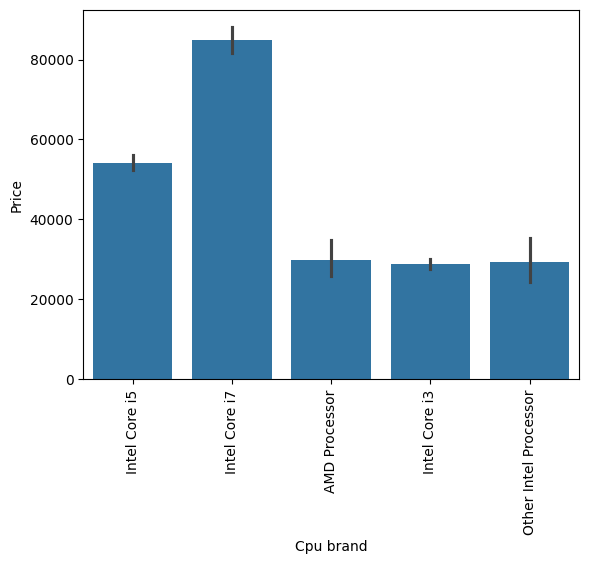

In [ ]:
sns.barplot(x=df['Cpu brand'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

 ### Intel Core i7 CPUs have the highest average price, which is typically used in high-performance laptops or desktops for tasks such as gaming, video editing, or software development.
### Intel Core i5 processors have a relatively high price but are lower than Core i7. They offer a balance of performance and cost.
### The category of Other Intel Processors has a moderate price point, typically representing more affordable and less powerful processors.
### AMD processors have lower average prices compared to all Intel processors. This suggests that AMD's positioning in the market is aimed at providing budget-friendly or value-based options, appealing to cost-conscious consumers.

In [45]:
filtered_df =df[df['Cpu brand'].isin(['Intel Core i7', 'Intel Core i5', 'Intel Core i3', 'Other Intel Processor', 'AMD Processor'])]

# Group by Company and calculate statistics
result = filtered_df.groupby('Cpu brand')['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display the result
print(result)

                               max        min          mean      median  \
Cpu brand                                                                 
AMD Processor          117162.7200  10602.720  29954.024457  25515.2592   
Intel Core i3           62176.1616  18061.920  28857.830929  26586.7200   
Intel Core i5          124142.4000  20986.992  54080.012426  50882.4000   
Intel Core i7          324954.7200  30849.120  85023.110883  78647.1408   
Other Intel Processor  261018.7200   9270.720  29323.848530  18594.7200   

                                std  
Cpu brand                            
AMD Processor          18221.555517  
Intel Core i3           7605.714292  
Intel Core i5          20012.979664  
Intel Core i7          37494.282855  
Other Intel Processor  35294.715256  


In [46]:
df.drop(columns=['Cpu','Cpu Name'],inplace=True)

In [ ]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand
422,HP,Notebook,8,256GB SSD,Intel HD Graphics 630,Windows 10,2.31,76030.56,0,0,141.211998,Intel Core i7
768,Samsung,Ultrabook,8,256GB SSD,Intel HD Graphics 620,Windows 10,1.31,85194.72,1,0,165.632118,Intel Core i7
741,Dell,Notebook,8,256GB SSD,Intel HD Graphics 520,Windows 10,2.00,35431.20,0,0,100.454670,Intel Core i3
580,Mediacom,Notebook,4,32GB SSD,Intel HD Graphics 500,Windows 10,1.45,20725.92,0,1,157.350512,Other Intel Processor
753,Lenovo,Ultrabook,4,180GB SSD,Intel HD Graphics 520,Windows 10,1.70,58394.88,0,0,157.350512,Intel Core i5


In [ ]:
df['Ram'].value_counts()

,count
Ram,
8,619
4,375
16,200
6,41
12,25
2,22
32,17
24,3
64,1


<Axes: xlabel='Ram', ylabel='Count'>

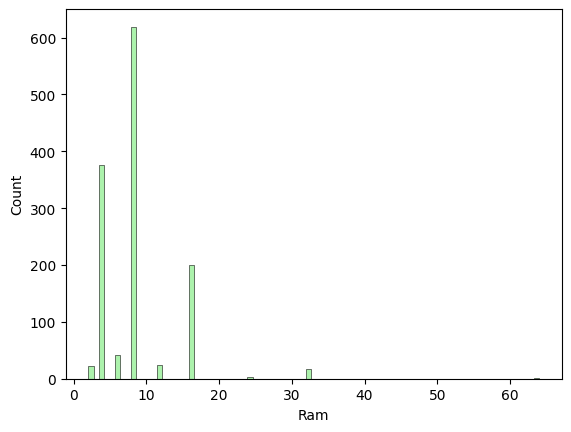

In [ ]:
sns.histplot(df['Ram'], color='lightgreen', edgecolor='black')

/tmp/ipython-input-67-2367553258.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Ram'], color='blue')


<Axes: xlabel='Ram', ylabel='Density'>

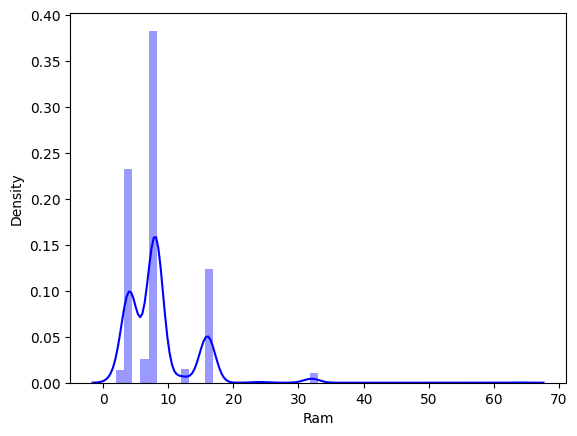

In [ ]:
sns.distplot(df['Ram'], color='blue')

<Axes: xlabel='Ram'>

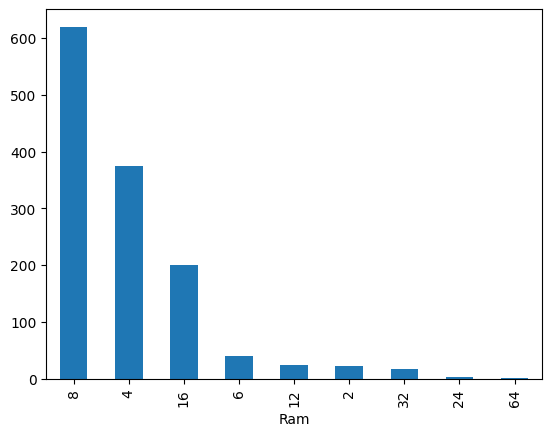

In [ ]:
df['Ram'].value_counts().plot(kind='bar')



*   **Most common RAM value:** The most common RAM value is 8 GB, with a significantly higher count compared to other values.

*  **Decreasing frequency:** As the RAM values increase, their frequency generally decreases. This suggests that fewer devices have higher RAM capacities.
*  **Concentration in lower RAM ranges:** The majority of devices seem to have RAM values between 2 GB and 16 GB, with a significant concentration around 8 GB.




<Axes: ylabel='count'>

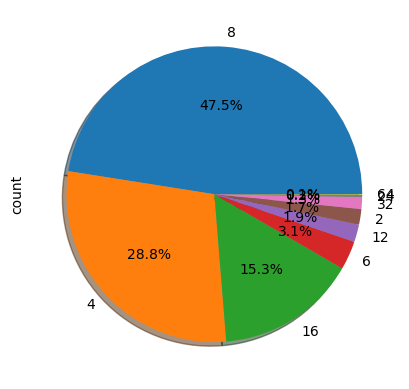

In [ ]:
df['Ram'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True)

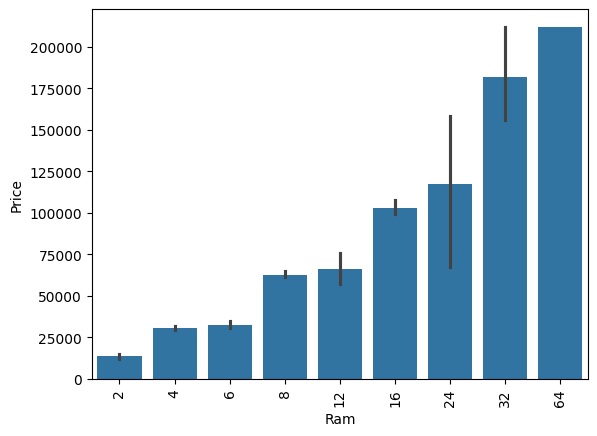

In [ ]:
sns.barplot(x=df['Ram'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()



*   The graph shows a clear positive correlation between RAM and price. As the RAM capacity increases, the average price also increases.

*   However, it's important to note that the error bars indicate some variability in price within each RAM category. This suggests that other factors besides RAM, such as brand, storage capacity, processor type, and additional features, can also influence the price of a device.



In [ ]:
RAM_2GB_Laptops = df[df['Ram'] == 2]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_4GB_Laptops = df[df['Ram'] == 4]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_6GB_Laptops = df[df['Ram'] == 6]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_8GB_Laptops = df[df['Ram'] == 8]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_12GB_Laptops = df[df['Ram'] == 12]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_16GB_Laptops = df[df['Ram'] == 16]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_24GB_Laptops = df[df['Ram'] == 24]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_32GB_Laptops= df[df['Ram'] == 32]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
RAM_64GB_Laptops = df[df['Ram'] == 64]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display results

print("RAM_2GB_Laptops :")
print(RAM_2GB_Laptops )

print("\nRAM_4GB_Laptops :")
print(RAM_4GB_Laptops )

print("\nRAM_6GB_Laptops :")
print(RAM_6GB_Laptops )

print("\nRAM_8GB_Laptops :")
print(RAM_8GB_Laptops )

print("\nRAM_12GB_Laptops :")
print(RAM_12GB_Laptops )

print("\nRAM_16GB_Laptops :")
print(RAM_16GB_Laptops )

print("\nRAM_24GB_Laptops :")
print(RAM_24GB_Laptops )

print("\nRAM_32GB_Laptops :")
print(RAM_32GB_Laptops )

print("\nRAM_64GB_Laptops :")
print(RAM_64GB_Laptops )

RAM_2GB_Laptops :
max       20193.120000
min        9270.720000
mean      13552.857818
median    12467.520000
std        3344.310871
Name: Price, dtype: float64

RAM_4GB_Laptops :
max       95850.720000
min       10442.880000
mean      30613.221734
median    26533.440000
std       14608.955639
Name: Price, dtype: float64

RAM_6GB_Laptops :
max       50562.720000
min       21791.520000
mean      32778.193873
median    30849.120000
std        6708.883223
Name: Price, dtype: float64

RAM_8GB_Laptops :
max       210424.032000
min        17529.120000
mean       62913.713455
median     58554.720000
std        25092.438655
Name: Price, dtype: float64

RAM_12GB_Laptops :
max       122490.720000
min        32447.520000
mean       66037.277952
median     66546.720000
std        25091.451422
Name: Price, dtype: float64

RAM_16GB_Laptops :
max       233845.920000
min        45768.052800
mean      103191.166872
median    100725.840000
std        30737.505787
Name: Price, dtype: float64

RAM_24GB_La

In [51]:
df['Memory'].value_counts()

,count
Memory,
256GB SSD,412
1TB HDD,223
500GB HDD,132
512GB SSD,118
128GB SSD + 1TB HDD,94
128GB SSD,76
256GB SSD + 1TB HDD,73
32GB Flash Storage,38
2TB HDD,16


In [52]:
for i in df['Memory'].unique():
  print(i)

128GB SSD
128GB Flash Storage
256GB SSD
512GB SSD
500GB HDD
256GB Flash Storage
1TB HDD
32GB Flash Storage
128GB SSD +  1TB HDD
256GB SSD +  256GB SSD
64GB Flash Storage
256GB SSD +  1TB HDD
256GB SSD +  2TB HDD
32GB SSD
2TB HDD
64GB SSD
1.0TB Hybrid
512GB SSD +  1TB HDD
1TB SSD
256GB SSD +  500GB HDD
128GB SSD +  2TB HDD
512GB SSD +  512GB SSD
16GB SSD
16GB Flash Storage
512GB SSD +  256GB SSD
512GB SSD +  2TB HDD
64GB Flash Storage +  1TB HDD
180GB SSD
1TB HDD +  1TB HDD
32GB HDD
1TB SSD +  1TB HDD
512GB Flash Storage
128GB HDD
240GB SSD
8GB SSD
508GB Hybrid
1.0TB HDD
512GB SSD +  1.0TB Hybrid
256GB SSD +  1.0TB Hybrid


In [53]:
df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)
df["Memory"] = df["Memory"].str.replace('GB', '')
df["Memory"] = df["Memory"].str.replace('TB', '000')

<>:1: SyntaxWarning: invalid escape sequence '\.'
<>:1: SyntaxWarning: invalid escape sequence '\.'
/tmp/ipython-input-3733626481.py:1: SyntaxWarning: invalid escape sequence '\.'
  df['Memory'] = df['Memory'].astype(str).replace('\.0', '', regex=True)


In [54]:
for i in df['Memory'].unique():
  print(i)

128 SSD
128 Flash Storage
256 SSD
512 SSD
500 HDD
256 Flash Storage
1000 HDD
32 Flash Storage
128 SSD +  1000 HDD
256 SSD +  256 SSD
64 Flash Storage
256 SSD +  1000 HDD
256 SSD +  2000 HDD
32 SSD
2000 HDD
64 SSD
1000 Hybrid
512 SSD +  1000 HDD
1000 SSD
256 SSD +  500 HDD
128 SSD +  2000 HDD
512 SSD +  512 SSD
16 SSD
16 Flash Storage
512 SSD +  256 SSD
512 SSD +  2000 HDD
64 Flash Storage +  1000 HDD
180 SSD
1000 HDD +  1000 HDD
32 HDD
1000 SSD +  1000 HDD
512 Flash Storage
128 HDD
240 SSD
8 SSD
508 Hybrid
512 SSD +  1000 Hybrid
256 SSD +  1000 Hybrid


In [55]:
new = df["Memory"].str.split("+", n = 1, expand = True)
new.sample(10)

,0,1
624,500 HDD,None
377,500 HDD,None
66,500 HDD,None
651,1000 HDD,None
139,256 SSD,None
981,128 SSD,None
602,32 Flash Storage,None
1110,256 SSD,None
23,256 SSD,None
955,512 SSD,1000 HDD


In [56]:
for i in new:
 print(new)

                      0     1
0               128 SSD  None
1     128 Flash Storage  None
2               256 SSD  None
3               512 SSD  None
4               256 SSD  None
...                 ...   ...
1298            128 SSD  None
1299            512 SSD  None
1300   64 Flash Storage  None
1301           1000 HDD  None
1302            500 HDD  None

[1303 rows x 2 columns]
                      0     1
0               128 SSD  None
1     128 Flash Storage  None
2               256 SSD  None
3               512 SSD  None
4               256 SSD  None
...                 ...   ...
1298            128 SSD  None
1299            512 SSD  None
1300   64 Flash Storage  None
1301           1000 HDD  None
1302            500 HDD  None

[1303 rows x 2 columns]


In [57]:
df["first"]= new[0]

for i in df['first'].unique():
  print(i)

128 SSD
128 Flash Storage
256 SSD
512 SSD
500 HDD
256 Flash Storage
1000 HDD
32 Flash Storage
128 SSD 
256 SSD 
64 Flash Storage
32 SSD
2000 HDD
64 SSD
1000 Hybrid
512 SSD 
1000 SSD
16 SSD
16 Flash Storage
64 Flash Storage 
180 SSD
1000 HDD 
32 HDD
1000 SSD 
512 Flash Storage
128 HDD
240 SSD
8 SSD
508 Hybrid


In [58]:
df["first"]=df["first"].str.strip()   # used to remove leading and trailing whitespace characters from the "first" column

In [59]:
df["second"]= new[1]

for i in df['second'].unique():
  print(i)

None
  1000 HDD
  256 SSD
  2000 HDD
  500 HDD
  512 SSD
  1000 Hybrid


In [60]:
df["Layer1HDD"] = df["first"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer1SSD"] = df["first"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer1Hybrid"] = df["first"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer1Flash_Storage"] = df["first"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [61]:
df['first'] = df['first'].str.replace(r'\D', '', regex=True)   # used to remove all non-digit characters from the "first" column

for i in df['first'].unique():
  print(i)

128
256
512
500
1000
32
64
2000
16
180
240
8
508


In [62]:
df["second"].fillna("0", inplace = True)    # used to replace missing values(NaN or None) in the "second" column with the value "0".

/tmp/ipython-input-3569581126.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["second"].fillna("0", inplace = True)    # used to replace missing values(NaN or None) in the "second" column with the value "0".


In [63]:
df["Layer2HDD"] = df["second"].apply(lambda x: 1 if "HDD" in x else 0)
df["Layer2SSD"] = df["second"].apply(lambda x: 1 if "SSD" in x else 0)
df["Layer2Hybrid"] = df["second"].apply(lambda x: 1 if "Hybrid" in x else 0)
df["Layer2Flash_Storage"] = df["second"].apply(lambda x: 1 if "Flash Storage" in x else 0)

In [64]:
df['second'] = df['second'].str.replace(r'\D', '', regex=True)   # # used to remove all non-digit characters from the "second" column

for i in df['second'].unique():
  print(i)

0
1000
256
2000
500
512


In [65]:
df["first"] = df["first"].astype(int)
df["second"] = df["second"].astype(int)

In [66]:
df

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,second,first,Layer1HDD,Layer1SSD,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage
0,Apple,Ultrabook,8,128 SSD,Intel Iris Plus Graphics 640,macOS,1.37,71378.6832,0,1,...,0,128,0,1,0,0,0,0,0,0
1,Apple,Ultrabook,8,128 Flash Storage,Intel HD Graphics 6000,macOS,1.34,47895.5232,0,0,...,0,128,0,0,0,1,0,0,0,0
2,HP,Notebook,8,256 SSD,Intel HD Graphics 620,No OS,1.86,30636.0000,0,0,...,0,256,0,1,0,0,0,0,0,0
3,Apple,Ultrabook,16,512 SSD,AMD Radeon Pro 455,macOS,1.83,135195.3360,0,1,...,0,512,0,1,0,0,0,0,0,0
4,Apple,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 650,macOS,1.37,96095.8080,0,1,...,0,256,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.6400,1,1,...,0,128,0,1,0,0,0,0,0,0
1299,Lenovo,2 in 1 Convertible,16,512 SSD,Intel HD Graphics 520,Windows 10,1.30,79866.7200,1,1,...,0,512,0,1,0,0,0,0,0,0
1300,Lenovo,Notebook,2,64 Flash Storage,Intel HD Graphics,Windows 10,1.50,12201.1200,0,0,...,0,64,0,0,0,1,0,0,0,0
1301,HP,Notebook,6,1000 HDD,AMD Radeon R5 M330,Windows 10,2.19,40705.9200,0,0,...,0,1000,1,0,0,0,0,0,0,0


In [67]:
df["HDD"]=(df["first"]*df["Layer1HDD"]+df["second"]*df["Layer2HDD"])
df["SSD"]=(df["first"]*df["Layer1SSD"]+df["second"]*df["Layer2SSD"])
df["Hybrid"]=(df["first"]*df["Layer1Hybrid"]+df["second"]*df["Layer2Hybrid"])
df["Flash_Storage"]=(df["first"]*df["Layer1Flash_Storage"]+df["second"]*df["Layer2Flash_Storage"])

In [68]:
df.sample(5)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,...,Layer1Hybrid,Layer1Flash_Storage,Layer2HDD,Layer2SSD,Layer2Hybrid,Layer2Flash_Storage,HDD,SSD,Hybrid,Flash_Storage
255,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.72,0,0,...,0,0,0,0,0,0,0,256,0,0
625,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce 920MX,Windows 10,2.20,47898.72,0,0,...,0,0,0,0,0,0,1000,0,0,0
1115,Dell,Ultrabook,8,256 SSD,Intel Iris Plus Graphics 640,Windows 10,1.23,73473.12,0,0,...,0,0,0,0,0,0,0,256,0,0
134,HP,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.05,31861.44,0,0,...,0,0,0,0,0,0,1000,0,0,0
348,Asus,2 in 1 Convertible,4,32 Flash Storage,Intel HD Graphics 500,Windows 10,1.50,19980.00,1,0,...,0,1,0,0,0,0,0,0,0,32


In [69]:
df.drop(columns=['first', 'second', 'Layer1HDD', 'Layer1SSD', 'Layer1Hybrid',
       'Layer1Flash_Storage', 'Layer2HDD', 'Layer2SSD', 'Layer2Hybrid',
       'Layer2Flash_Storage'],inplace=True)

In [70]:
df.sample(10)

,Company,TypeName,Ram,Memory,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Hybrid,Flash_Storage
444,HP,Gaming,8,128 SSD + 1000 HDD,Nvidia GeForce GTX 1050,Windows 10,2.20,58554.720,0,1,141.211998,Intel Core i7,1000,128,0,0
973,Toshiba,Notebook,8,256 SSD,Intel HD Graphics 520,Windows 10,1.95,62870.400,0,0,157.350512,Intel Core i5,0,256,0,0
216,Lenovo,Notebook,8,1000 HDD,Nvidia GeForce GTX 940MX,No OS,2.80,31381.920,0,0,106.113062,Intel Core i5,1000,0,0,0
677,HP,2 in 1 Convertible,8,64 Flash Storage,Intel HD Graphics 500,Chrome OS,1.40,26373.600,1,0,135.094211,Other Intel Processor,0,0,0,64
418,Dell,Notebook,8,1000 HDD,Intel HD Graphics 620,Windows 10,2.14,28768.536,0,0,100.454670,Intel Core i5,1000,0,0,0
969,Lenovo,Notebook,6,256 SSD,Nvidia GeForce 920MX,Windows 10,2.40,37029.600,0,0,141.211998,Intel Core i5,0,256,0,0
1245,Asus,Gaming,16,256 SSD + 1000 HDD,Nvidia GeForce GTX 1050 Ti,Windows 10,2.50,85248.000,0,1,141.211998,Intel Core i7,1000,256,0,0
24,HP,Ultrabook,8,256 SSD,Intel HD Graphics 620,Windows 10,1.91,35111.520,0,0,141.211998,Intel Core i7,0,256,0,0
1270,Lenovo,2 in 1 Convertible,4,128 SSD,Intel HD Graphics 520,Windows 10,1.80,33992.640,1,1,157.350512,Intel Core i7,0,128,0,0
255,Dell,Ultrabook,8,256 SSD,Intel UHD Graphics 620,Windows 10,1.41,50562.720,0,0,165.632118,Intel Core i5,0,256,0,0


In [71]:
df.drop(columns=['Memory'],inplace=True)

/tmp/ipython-input-3982814284.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['HDD'])


<Axes: xlabel='HDD', ylabel='Density'>

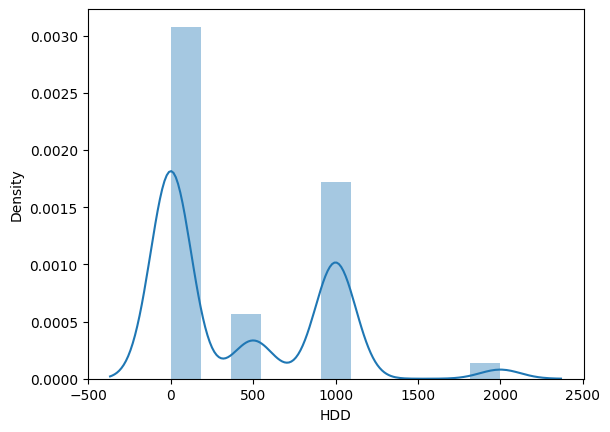

In [72]:
sns.distplot(df['HDD'])

<Axes: xlabel='HDD', ylabel='Count'>

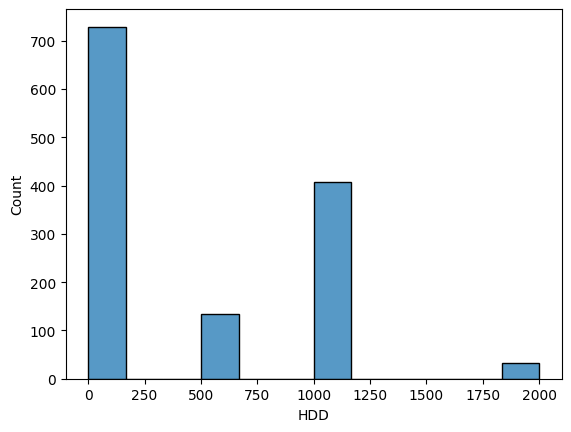

In [ ]:
sns.histplot(df['HDD'])

<Axes: xlabel='HDD'>

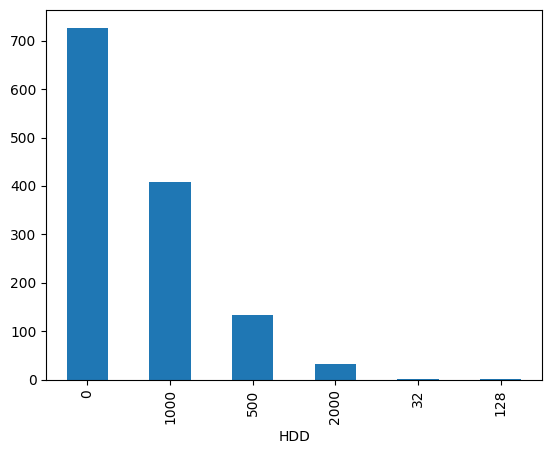

In [ ]:
df['HDD'].value_counts().plot(kind='bar')

### The chart shows that most laptops no longer use HDDs (represented by an HDD size of 0), likely due to the shift towards SSDs. Among laptops with HDDs, 1 TB is the most popular size, followed by 500 GB. Larger sizes like 2 TB and smaller ones like 32 GB and 128 GB are rare. This indicates a clear trend toward SSDs replacing traditional HDDs, as SSDs are faster and more reliable.

<Axes: ylabel='count'>

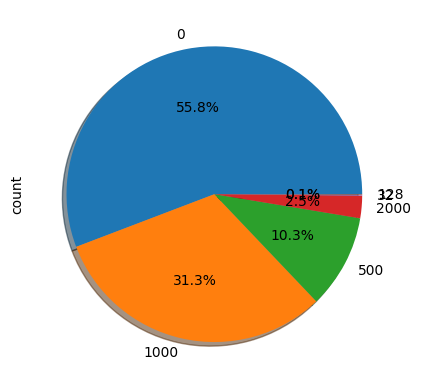

In [ ]:
df['HDD'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True)

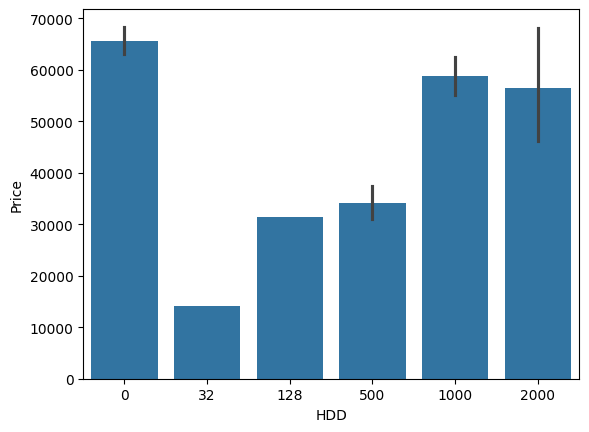

In [ ]:
sns.barplot(x=df['HDD'],y=df['Price'])
plt.show()

In [73]:
HDD_0GB_Laptops = df[df['HDD'] == 0]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
HDD_32GB_Laptops = df[df['HDD'] == 32]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
HDD_128GB_Laptops = df[df['HDD'] == 128]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
HDD_500GB_Laptops = df[df['HDD'] == 500]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
HDD_1000GB_Laptops = df[df['HDD'] == 1000]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
HDD_2000GB_Laptops = df[df['HDD'] == 2000]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display results

print("HDD_0GB_Laptops  :")
print(HDD_0GB_Laptops  )

print("\nHDD_32GB_Laptops :")
print(HDD_32GB_Laptops)

print("\nHDD_128GB_Laptops  :")
print(HDD_128GB_Laptops)

print("\nHDD_500GB_Laptops  :")
print(HDD_500GB_Laptops )

print("\nHDD_1000GB_Laptops  :")
print(HDD_1000GB_Laptops  )

print("\nHDD_2000GB_Laptops  :")
print(HDD_2000GB_Laptops  )

HDD_0GB_Laptops  :
max       324954.720000
min         9270.720000
mean       65500.189403
median     59567.040000
std        38144.155571
Name: Price, dtype: float64

HDD_32GB_Laptops :
max       14119.2
min       14119.2
mean      14119.2
median    14119.2
std           NaN
Name: Price, dtype: float64

HDD_128GB_Laptops  :
max       31435.2
min       31435.2
mean      31435.2
median    31435.2
std           NaN
Name: Price, dtype: float64

HDD_500GB_Laptops  :
max       112065.955200
min        11934.720000
mean       34147.004884
median     28638.000000
std        18387.361155
Name: Price, dtype: float64

HDD_1000GB_Laptops  :
max       207259.200000
min        13445.740800
mean       58741.573482
median     47898.720000
std        36973.482297
Name: Price, dtype: float64

HDD_2000GB_Laptops  :
max       141138.720000
min        20725.920000
mean       56381.661900
median     49814.136000
std        32509.469152
Name: Price, dtype: float64


/tmp/ipython-input-99-3442927523.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['SSD'])


<Axes: xlabel='SSD', ylabel='Density'>

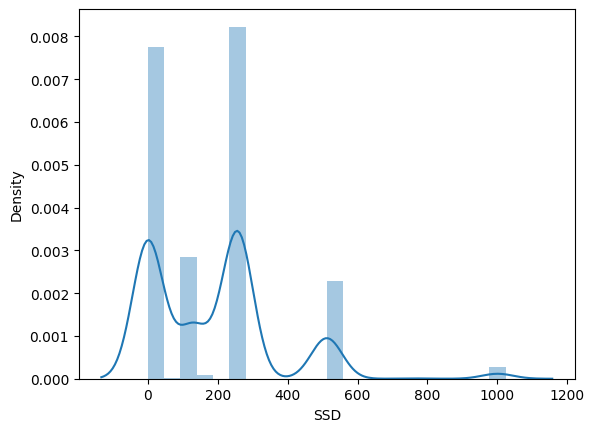

In [ ]:
sns.distplot(df['SSD'])

<Axes: xlabel='SSD', ylabel='Count'>

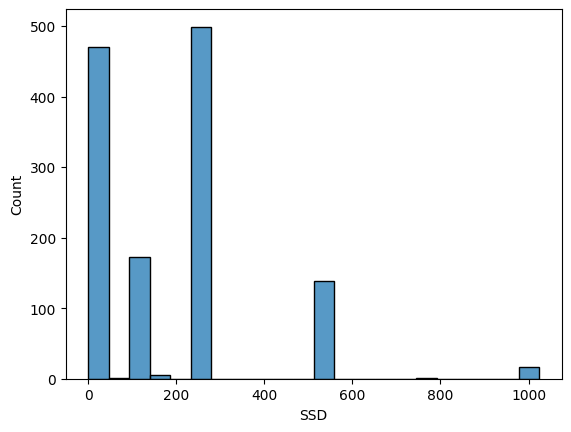

In [ ]:
sns.histplot(df['SSD'])

### The most common value of SSD is 0 and 256, with a frequency of around 500. As the values increase, the frequency generally decreases. This suggests a right-skewed distribution, where most of the data points are concentrated towards the lower end of the range.

<Axes: xlabel='SSD'>

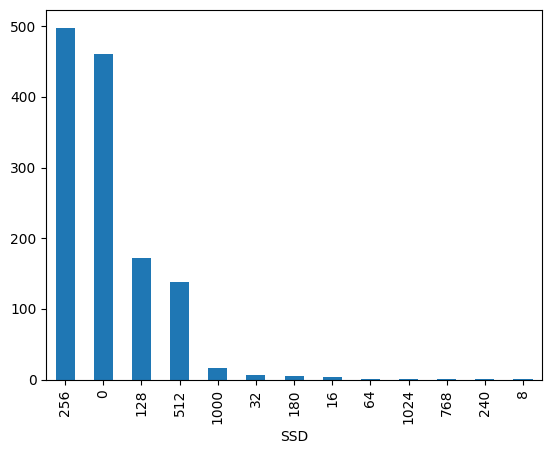

In [ ]:
df['SSD'].value_counts().plot(kind='bar')

<Axes: ylabel='count'>

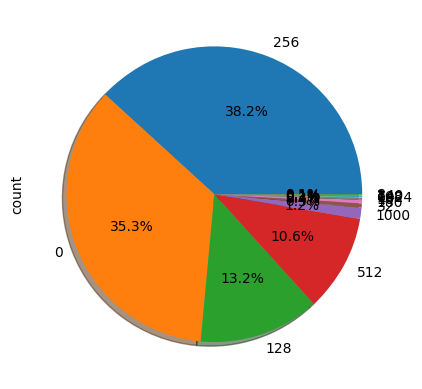

In [ ]:
df['SSD'].value_counts().plot(kind='pie',autopct='%1.1f%%', shadow=True)

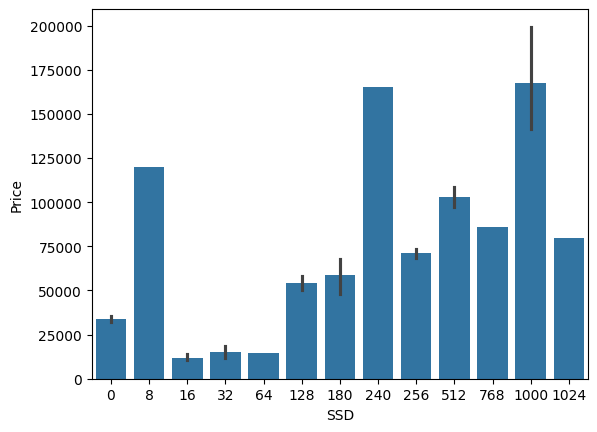

In [ ]:
sns.barplot(x=df['SSD'],y=df['Price'])
plt.show()

In [74]:
SSD_0GB_Laptops = df[df['SSD'] == 0]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_8GB_Laptops = df[df['SSD'] == 8]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_16GB_Laptops = df[df['SSD'] == 16]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_32GB_Laptops = df[df['SSD'] == 32]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_64GB_Laptops = df[df['SSD'] == 64]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_128GB_Laptops = df[df['SSD'] == 128]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_180GB_Laptops = df[df['SSD'] == 180]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_240GB_Laptops = df[df['SSD'] == 240]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_256GB_Laptops = df[df['SSD'] == 256]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_512GB_Laptops = df[df['SSD'] == 512]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_768GB_Laptops = df[df['SSD'] == 768]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_1000GB_Laptops = df[df['SSD'] == 1000]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])
SSD_1024GB_Laptops = df[df['SSD'] == 1024]['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display results

print("SSD_0GB_Laptops  :")
print(SSD_0GB_Laptops)

print("\nSSD_8GB_Laptops  :")
print(SSD_8GB_Laptops)

print("\nSSD_16GB_Laptops  :")
print(SSD_16GB_Laptops)

print("\nSSD_32GB_Laptops  :")
print(SSD_32GB_Laptops)

print("\nSSD_64GB_Laptops  :")
print(SSD_64GB_Laptops)

print("\nSSD_128GB_Laptops  :")
print(SSD_128GB_Laptops)

print("\nSSD_180GB_Laptops  :")
print(SSD_180GB_Laptops)

print("\nSSD_240GB_Laptops  :")
print(SSD_240GB_Laptops)

print("\nSSD_256GB_Laptops  :")
print(SSD_256GB_Laptops)

print("\nSSD_512GB_Laptops  :")
print(SSD_512GB_Laptops)

print("\nSSD_768GB_Laptops  :")
print(SSD_768GB_Laptops)

print("\nSSD_1000GB_Laptops  :")
print(SSD_1000GB_Laptops)

print("\nSSD_1024GB_Laptops  :")
print(SSD_1024GB_Laptops)

SSD_0GB_Laptops  :
max       154458.720000
min        10224.432000
mean       33985.081190
median     29916.720000
std        18307.026924
Name: Price, dtype: float64

SSD_8GB_Laptops  :
max       119826.72
min       119826.72
mean      119826.72
median    119826.72
std             NaN
Name: Price, dtype: float64

SSD_16GB_Laptops  :
max       14119.200000
min       10602.720000
mean      11952.480000
median    11135.520000
std        1895.250809
Name: Price, dtype: float64

SSD_32GB_Laptops  :
max       20725.92000
min        9270.72000
mean      15175.92000
median    14598.72000
std        4446.30033
Name: Price, dtype: float64

SSD_64GB_Laptops  :
max       14811.3072
min       14811.3072
mean      14811.3072
median    14811.3072
std              NaN
Name: Price, dtype: float64

SSD_128GB_Laptops  :
max       160520.385600
min        14418.633600
mean       54156.050205
median     52587.360000
std        25223.776586
Name: Price, dtype: float64

SSD_180GB_Laptops  :
max       72673.

In [75]:
numeric_df = df.select_dtypes(include=['float', 'int'])
price_corr = numeric_df.corr()['Price']
print(price_corr)

Ram              0.743007
Weight           0.210370
Price            1.000000
Touchscreen      0.191226
IPS              0.252208
PPI              0.473487
HDD             -0.096441
SSD              0.670799
Hybrid           0.007989
Flash_Storage   -0.040511
Name: Price, dtype: float64


The strongest factors influencing laptop price are RAM (0.743) and SSD (0.671), both showing a strong positive correlation, meaning laptops with more RAM and SSD tend to be more expensive. PPI (0.473) also has a moderate positive correlation, while IPS (0.252), Weight (0.210), and Touchscreen (0.191) show weak positive correlations. HDD (-0.096) and Flash Storage (-0.041) have slight negative correlations, indicating they do not significantly raise prices, and Hybrid (0.008) has almost no effect on price.

In [76]:
df.drop(columns=['Hybrid','Flash_Storage'],inplace=True)  # we dropped it bcz we get the best results

In [77]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD
680,MSI,Gaming,8,Nvidia GeForce GTX 1050,Windows 10,2.20,53168.112,0,0,141.211998,Intel Core i5,0,256
798,Lenovo,2 in 1 Convertible,8,Intel HD Graphics 620,Windows 10,1.38,71874.720,1,1,158.482530,Intel Core i7,0,256
1277,Acer,Notebook,4,Intel HD Graphics 400,Linux,2.40,15397.920,0,0,100.454670,Other Intel Processor,500,0
925,Dell,Notebook,4,Intel HD Graphics 520,Windows 10,1.95,38889.072,0,0,100.454670,Intel Core i5,500,0
123,HP,Notebook,16,Nvidia GeForce 930MX,Windows 10,2.50,67718.880,0,0,127.335675,Intel Core i7,0,512


In [78]:
df['Gpu'].value_counts()

,count
Gpu,
Intel HD Graphics 620,281
Intel HD Graphics 520,185
Intel UHD Graphics 620,68
Nvidia GeForce GTX 1050,66
Nvidia GeForce GTX 1060,48
...,...
Nvidia Quadro M500M,1
AMD Radeon R7 M360,1
Nvidia Quadro M3000M,1


In [79]:
df['Gpu brand'] = df['Gpu'].apply(lambda x:x.split()[0])  # extracting only the brand names from GPU

In [80]:
df.sample(5)

,Company,TypeName,Ram,Gpu,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
781,Asus,Gaming,16,Nvidia GeForce GTX 1070,Windows 10,4.30,125208.00,0,1,127.335675,Intel Core i7,1000,256,Nvidia
63,Asus,Notebook,8,Intel UHD Graphics 620,Windows 10,1.40,50136.48,0,0,157.350512,Intel Core i5,0,256,Intel
1120,Vero,Notebook,4,Intel HD Graphics 400,Windows 10,1.35,10442.88,0,0,165.632118,Other Intel Processor,0,0,Intel
371,Acer,Notebook,4,AMD Radeon R5,Windows 10,2.10,22697.28,0,0,100.454670,AMD Processor,0,128,AMD
320,HP,Notebook,8,Intel HD Graphics 620,Windows 10,1.48,68837.76,0,0,157.350512,Intel Core i7,0,256,Intel


In [81]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180
ARM,1


In [82]:
df = df[df['Gpu brand'] != 'ARM']

In [83]:
df['Gpu brand'].value_counts()

,count
Gpu brand,
Intel,722
Nvidia,400
AMD,180


<Axes: xlabel='Gpu brand', ylabel='Count'>

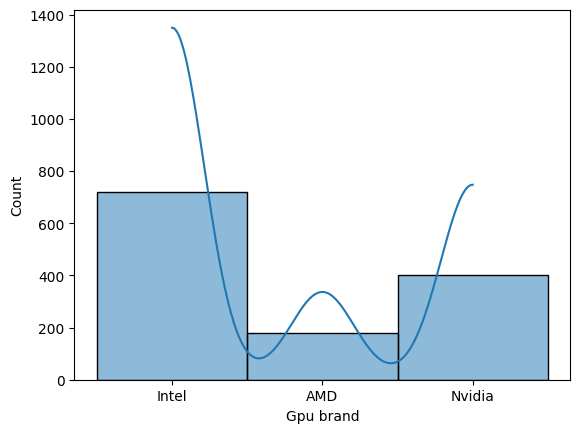

In [84]:
sns.histplot(df['Gpu brand'], kde=True)

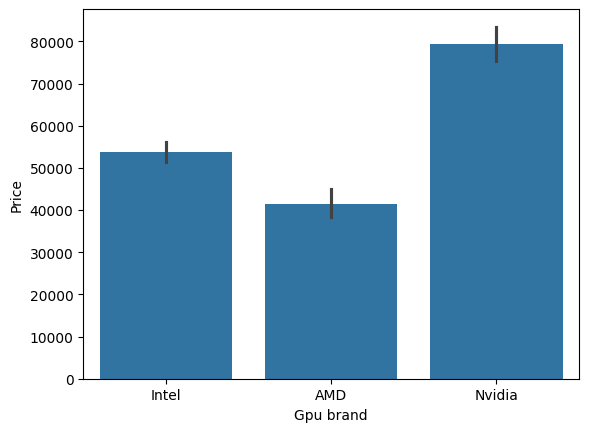

In [85]:
sns.barplot(x=df['Gpu brand'],y=df['Price'])
plt.show()

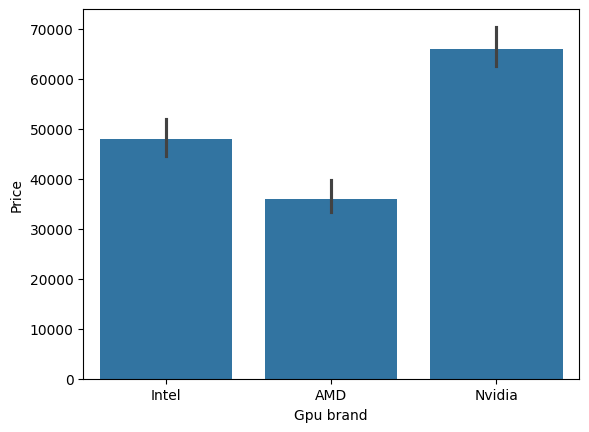

In [ ]:
sns.barplot(x=df['Gpu brand'],y=df['Price'],estimator='median')
plt.show()

In [86]:
filtered_df =df[df['Gpu brand'].isin([ 'Intel', 'AMD', 'Nvidia'])]

# Group by Company and calculate statistics
result = filtered_df.groupby('Gpu brand')['Price'].agg(['max', 'min', 'mean', 'median', 'std'])

# Display the result
print(result)

                 max       min          mean     median           std
Gpu brand                                                            
AMD        154458.72  10602.72  41326.507680  36026.604  23099.931781
Intel      165168.00   9270.72  53718.258994  47978.640  31445.078093
Nvidia     324954.72  24455.52  79380.500040  66013.920  43511.774905


In [87]:
df.drop(columns=['Gpu'],inplace=True)

/tmp/ipython-input-1111925144.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['Gpu'],inplace=True)


In [88]:
df.sample()

,Company,TypeName,Ram,OpSys,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand
502,Lenovo,2 in 1 Convertible,8,Windows 10,1.4,85194.72,1,1,158.48253,Intel Core i5,0,256,Intel


In [89]:
df['OpSys'].value_counts()

,count
OpSys,
Windows 10,1072
No OS,66
Linux,62
Windows 7,45
Chrome OS,26
macOS,13
Mac OS X,8
Windows 10 S,8
Android,2


([0, 1, 2, 3, 4, 5, 6, 7, 8],
 [Text(0, 0, 'macOS'),
  Text(1, 0, 'No OS'),
  Text(2, 0, 'Windows 10'),
  Text(3, 0, 'Mac OS X'),
  Text(4, 0, 'Linux'),
  Text(5, 0, 'Android'),
  Text(6, 0, 'Windows 10 S'),
  Text(7, 0, 'Chrome OS'),
  Text(8, 0, 'Windows 7')])

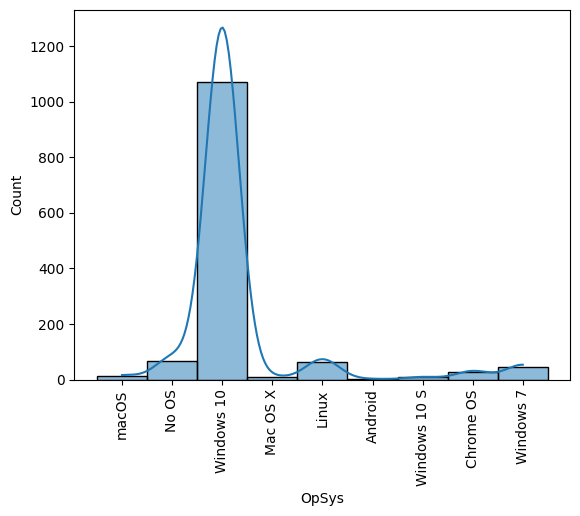

In [90]:
sns.histplot(df['OpSys'], kde=True)
plt.xticks(rotation='vertical')

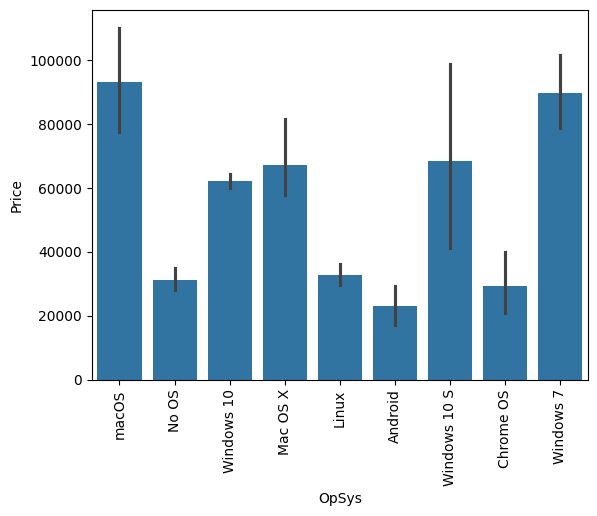

In [ ]:
sns.barplot(x=df['OpSys'],y=df['Price'])
plt.xticks(rotation='vertical')
plt.show()

* macOS shows the highest average price, indicating that laptops with macOS tend to be the most expensive.
* Laptops with Windows 10 and Mac OS X also tend to have higher average prices, but not as high as macOS.
* No OS, Linux, Android, and Chrome OS are associated with significantly lower average laptop prices, suggesting that these operating systems are often found on lower-cost devices.
* Windows 10 S and Windows 7 fall in between, having moderate price ranges, but there’s greater variability in price for Windows 10 S devices.

 **what could be the possible reasons that windows 7 laptops have higher average price than windows 10 laptops, even though windows 10 is better operating system than windows 7 ?**

**Ans-**
* Business and Industrial Use: Some businesses or industries may have specific requirements for Windows 7, and laptops configured for these purposes may include high-performance components, driving up the price.

* Limited Availability: As Windows 7 is no longer actively supported or sold, laptops pre-installed with Windows 7 might be in limited supply, making them more expensive in niche markets where they are still required.

* Custom Enterprise Solutions: High-end enterprise laptops often come pre-installed with older operating systems like Windows 7 for custom software environments, leading to higher prices due to additional business features, support, and security.

In [91]:
def cat_os(inp):
    if inp == 'Windows 10' or inp == 'Windows 7' or inp == 'Windows 10 S':
        return 'Windows'
    elif inp == 'macOS' or inp == 'Mac OS X':
        return 'Mac'
    else:
        return 'Others/No OS/Linux'

In [92]:
df['OS'] = df['OpSys'].apply(cat_os)

/tmp/ipython-input-3218697124.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['OS'] = df['OpSys'].apply(cat_os)


In [93]:
df.drop(columns=['OpSys'],inplace=True)

/tmp/ipython-input-3105339334.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.drop(columns=['OpSys'],inplace=True)


In [94]:
df.sample(5)

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
893,Lenovo,Ultrabook,8,1.32,95850.72,0,1,157.350512,Intel Core i5,0,256,Intel,Windows
315,Dell,Notebook,8,2.33,44968.32,0,0,141.211998,Intel Core i5,1000,128,AMD,Windows
499,Lenovo,Notebook,8,2.30,48538.08,0,1,141.211998,Intel Core i5,0,256,Intel,Windows
190,Lenovo,2 in 1 Convertible,16,1.42,150462.72,1,0,209.800683,Intel Core i7,0,1000,Intel,Windows
790,Asus,Gaming,8,2.24,71341.92,0,0,141.211998,Intel Core i7,1000,128,Nvidia,Windows


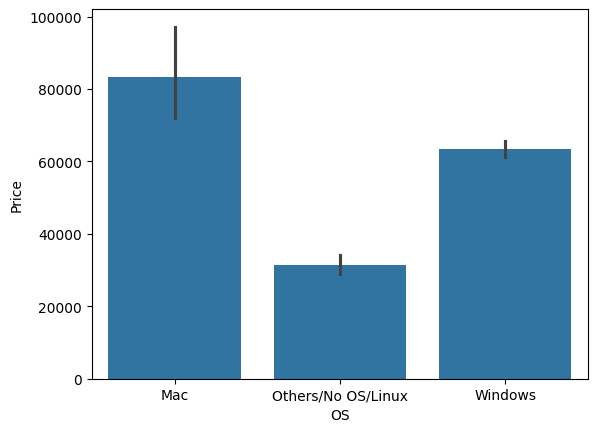

In [95]:
sns.barplot(x=df['OS'],y=df['Price'])
plt.show()

/tmp/ipython-input-128-2098956470.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['Weight'])


<Axes: xlabel='Weight', ylabel='Density'>

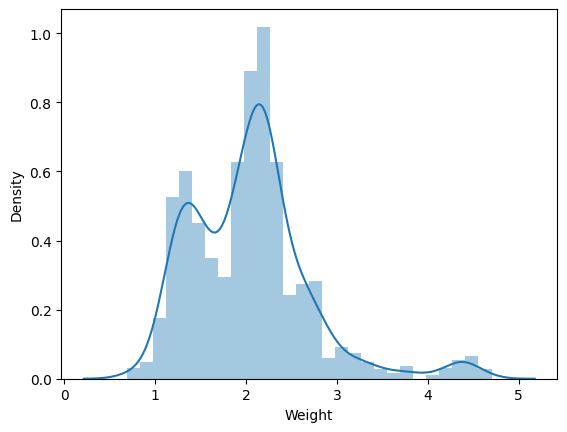

In [ ]:
# Since weight is a continouus variable, we can't plot the bar plot.
sns.distplot(df['Weight'])

In [ ]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


### Assumptions for Linear Regression :-
1.) Linear relationship between the independent and dependent variables.
* Linear relationship b/w continuous input variables and target variable i.e., (by using scatterplot)

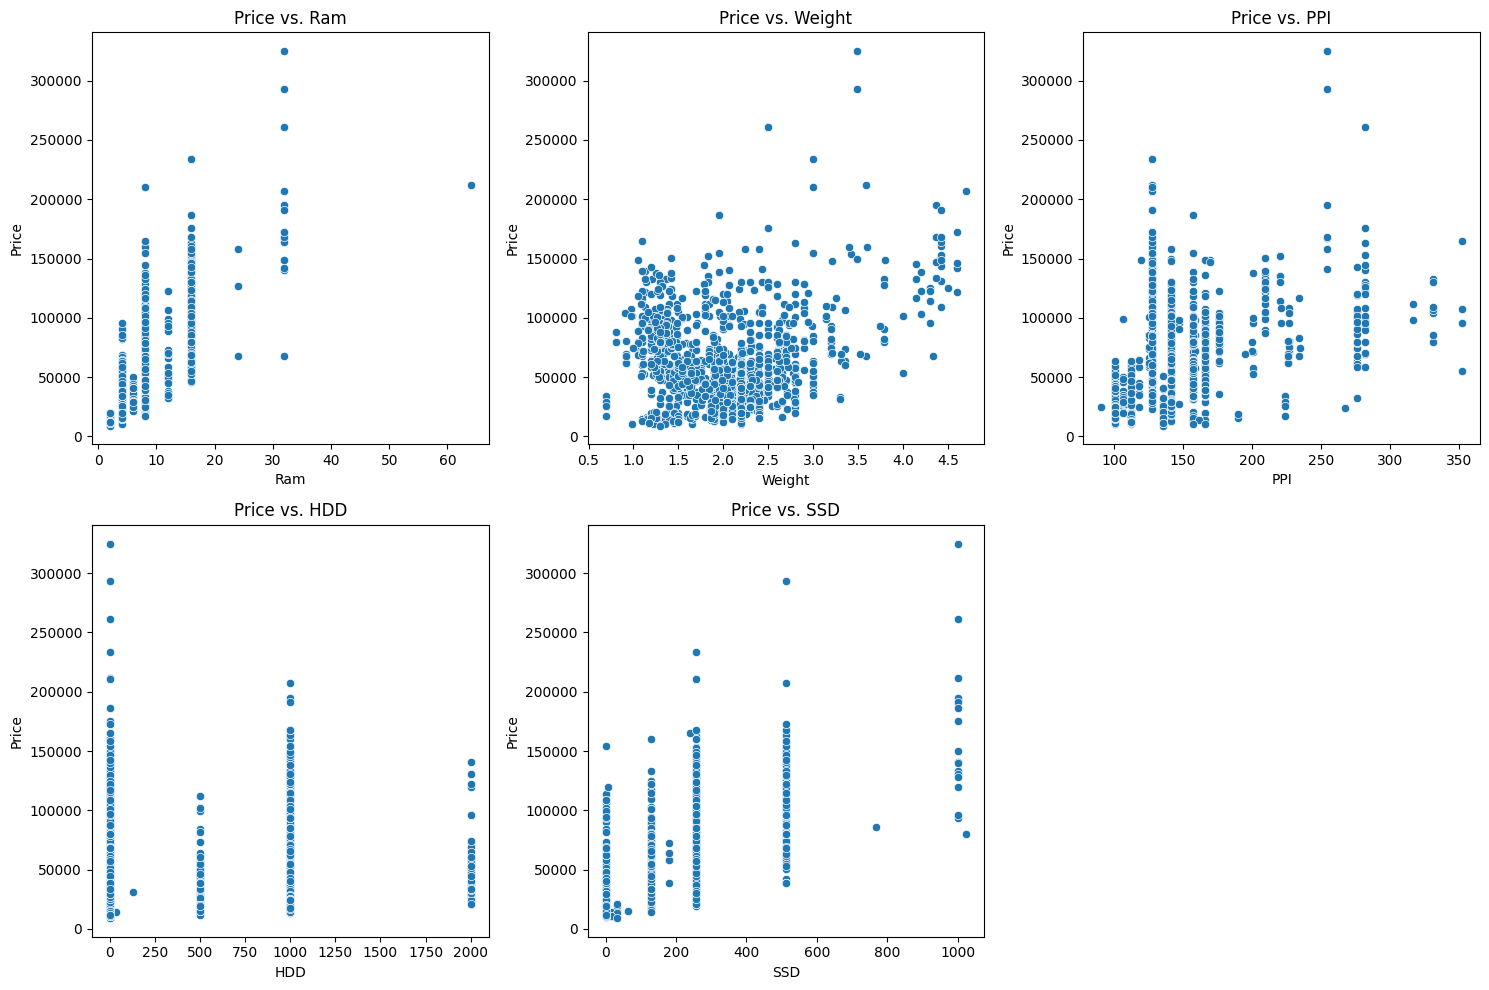

In [96]:
categorical_features = ['Company','TypeName', 'Cpu brand','Gpu brand', 'OS']
numerical_features = ['Ram','Weight','PPI','HDD','SSD',]
# 1. Linearity (Scatter plots of numerical features vs. price)

num_numerical = len(numerical_features)
rows = (num_numerical + 2) // 3  # Calculate the number of rows needed
cols = min(num_numerical, 3)     # Use at most 3 columns

plt.figure(figsize=(15, 5 * rows))  # Adjust figure size for better readability

for i, feature in enumerate(numerical_features):
    plt.subplot(rows, cols, i + 1)
    sns.scatterplot(x=df[feature], y=df['Price'])
    plt.title(f'Price vs. {feature}')

plt.tight_layout()
plt.show()

### 2) No perfect multicollinearity

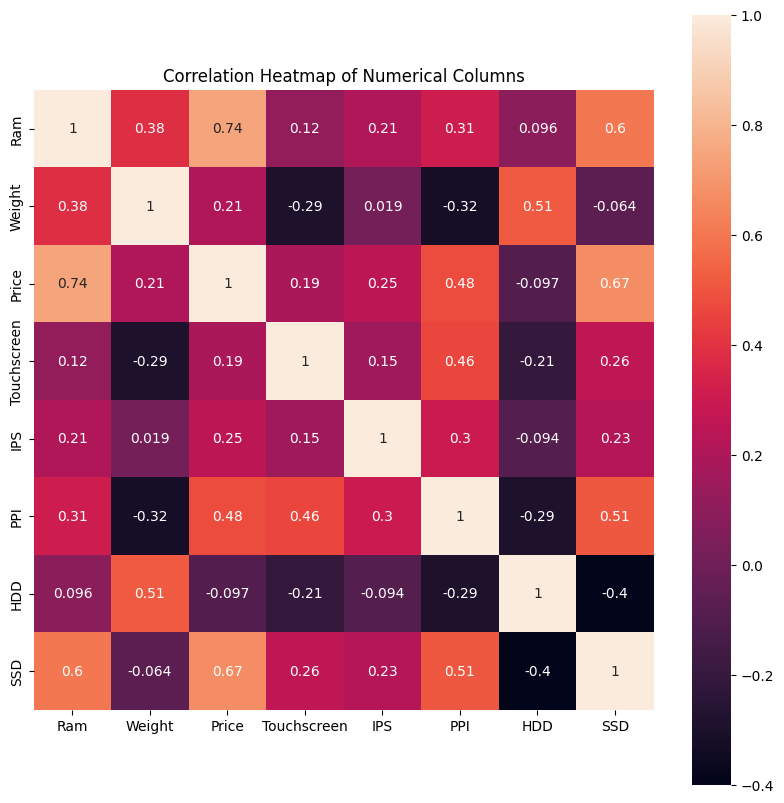

In [ ]:
numerical_df = df.select_dtypes(include=['int','float'])
correlation_matrix = numerical_df.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation_matrix, annot=True, square=True)
plt.title('Correlation Heatmap of Numerical Columns')
plt.show()

# the more lighter shade/colour, the stronger correlation between the features.

**Strong Positive Correlations:**
* SSD vs. Ram: laptops with more RAM are likely to also have SSDs.
* PPI vs. SSD: laptops with higher-resolution displays are more likely to have SSDs.

**Moderate Positive Correlations:**
* Ram vs. Weight: laptops with more RAM might be slightly heavier.
* PPI vs. Weight: laptops with higher-resolution displays might be slightly heavier.

**Weak Positive Correlations:**
* Touchscreen vs. Weight: a slight association between touchscreen features and slightly heavier laptops.
* IPS vs. Weight: A similar weak positive correlation is observed between IPS panels and weight.

**Negative Correlations:**
* HDD vs. SSD: laptops with SSDs are less likely to have HDDs.
* HDD vs. Ram: laptops with more RAM are less likely to have HDDs.

**Other correlations:**
* Most other correlations are relatively weak, indicating that the relationships between these features are not particularly strong.

**Overall:**
The heatmap reveals several significant relationships between the features. Notably, the strong positive correlations between SSD and both RAM and PPI suggest that laptops with high-performance configurations (more RAM and higher resolution) are more likely to have SSDs. Additionally, the negative correlations between HDD and both SSD and RAM highlight the trend towards replacing HDDs with SSDs in modern laptops.

**Key takeaways:**
* SSD is a key feature: SSDs are strongly associated with higher-performance laptops, as evidenced by their correlations with RAM and PPI.
HDD is becoming less common: HDDs are increasingly being replaced by SSDs, especially in laptops with higher-performance configurations.
Weight and performance: While there are some correlations between weight and performance-related features (RAM and PPI), these relationships are not particularly strong.

* This heatmap provides valuable insights for stakeholders (such as consumers or manufacturers) in understanding which features are most influential in the pricing of laptops. It also emphasizes the importance of RAM and SSDs as crucial selling points in the current market.

In [ ]:
df1=df.copy()

In [ ]:
df1

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [ ]:
# Variance Inflation Factor

import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# List of categorical columns
categorical_cols = ['Company', 'TypeName', 'Cpu brand', 'Gpu brand', 'OS']

# 1. One-hot encode categorical variables
df_encoded = pd.get_dummies(df1, columns=categorical_cols, drop_first=True)

# 2. Drop the dependent variable
X = df_encoded.drop(columns=['Price'])

# 3. Ensure all data is of float type (important for VIF)
X = X.astype(float)

# 4. Add constant for intercept
X_const = sm.add_constant(X)

# 5. Calculate VIF
vif_data = pd.DataFrame()
vif_data['Feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

# 6. Drop intercept from result
vif_data = vif_data[vif_data['Feature'] != 'const']

print(vif_data)

/usr/local/lib/python3.11/dist-packages/statsmodels/regression/linear_model.py:1782: RuntimeWarning: divide by zero encountered in scalar divide
  return 1 - self.ssr/self.centered_tss
/usr/local/lib/python3.11/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                            Feature       VIF
1                               Ram  2.941783
2                            Weight  3.364389
3                       Touchscreen  3.578359
4                               IPS  1.476746
5                               PPI  2.176525
6                               HDD  2.074214
7                               SSD  2.988017
8                     Company_Apple       inf
9                      Company_Asus  2.507897
10                    Company_Chuwi  1.064616
11                     Company_Dell  3.646974
12                  Company_Fujitsu  1.044246
13                   Company_Google  1.121892
14                       Company_HP  3.211348
15                   Company_Huawei  1.041202
16                       Company_LG  1.092760
17                   Company_Lenovo  3.195064
18                      Company_MSI  2.104862
19                 Company_Mediacom  1.139622
20                Company_Microsoft  1.188430
21                    Company_Raze

In [ ]:
df_encoded

,Ram,Weight,Price,Touchscreen,IPS,PPI,HDD,SSD,Company_Apple,Company_Asus,...,TypeName_Ultrabook,TypeName_Workstation,Cpu brand_Intel Core i3,Cpu brand_Intel Core i5,Cpu brand_Intel Core i7,Cpu brand_Other Intel Processor,Gpu brand_Intel,Gpu brand_Nvidia,OS_Others/No OS/Linux,OS_Windows
0,8,1.37,71378.6832,0,1,226.983005,0,128,True,False,...,True,False,False,True,False,False,True,False,False,False
1,8,1.34,47895.5232,0,0,127.677940,0,0,True,False,...,True,False,False,True,False,False,True,False,False,False
2,8,1.86,30636.0000,0,0,141.211998,0,256,False,False,...,False,False,False,True,False,False,True,False,True,False
3,16,1.83,135195.3360,0,1,220.534624,0,512,True,False,...,True,False,False,False,True,False,False,False,False,False
4,8,1.37,96095.8080,0,1,226.983005,0,256,True,False,...,True,False,False,True,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,4,1.80,33992.6400,1,1,157.350512,0,128,False,False,...,False,False,False,False,True,False,True,False,False,True
1299,16,1.30,79866.7200,1,1,276.053530,0,512,False,False,...,False,False,False,False,True,False,True,False,False,True
1300,2,1.50,12201.1200,0,0,111.935204,0,0,False,False,...,False,False,False,False,False,True,True,False,False,True
1301,6,2.19,40705.9200,0,0,100.454670,1000,0,False,False,...,False,False,False,False,True,False,False,False,False,True


# All our features have VIF values around 1.0 to 1.01, which means:

* There is no significant multicollinearity among your independent variables.

* The predictors are almost linearly independent from one another.

* We are good to go with these features in our linear regression model.

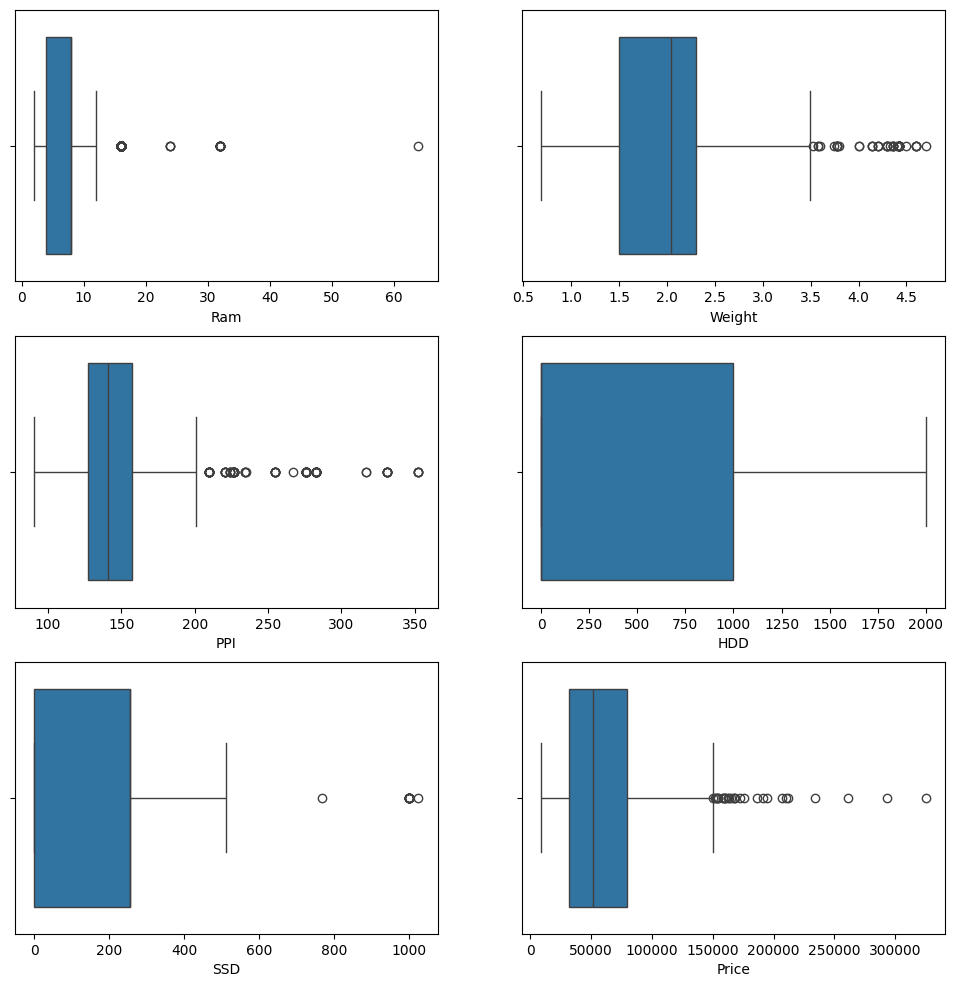

In [ ]:
fig, a = plt.subplots(3, 2, figsize=(12, 12))
sns.boxplot(x=df['Ram'],ax=a[0][0])
sns.boxplot(x=df['Weight'],ax=a[0][1])
sns.boxplot(x=df['PPI'],ax=a[1][0])
sns.boxplot(x=df['HDD'],ax=a[1][1])
sns.boxplot(x=df['SSD'], ax=a[2][0])
sns.boxplot(x=df['Price'], ax=a[2][1])
plt.show()

In [ ]:
high_ram_laptops = df[df['Ram'] > 10]
high_ram_laptops

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
8,Asus,Ultrabook,16,1.30,79653.6000,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
12,Apple,Ultrabook,16,1.83,130001.6016,0,1,220.534624,Intel Core i7,0,256,AMD,Mac
17,Apple,Ultrabook,16,1.83,152274.2400,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1247,Asus,Gaming,16,2.34,123876.0000,0,1,141.211998,Intel Core i7,1000,256,Nvidia,Windows
1256,Asus,Gaming,16,4.00,101232.0000,0,1,127.335675,Intel Core i7,1000,128,Nvidia,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1285,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows


In [ ]:
heavy_weight_laptops = df[df['Weight'] > 3.5]
heavy_weight_laptops

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
177,MSI,Gaming,32,4.40,149130.7200,0,0,119.723216,Intel Core i7,1000,512,Nvidia,Windows
224,Dell,Gaming,16,4.42,130873.7952,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
238,Asus,Gaming,32,4.70,207259.2000,0,0,127.335675,Intel Core i7,1000,512,Nvidia,Windows
247,Asus,Gaming,16,3.60,159786.7200,0,0,127.335675,Intel Core i7,0,256,Nvidia,Windows
251,Asus,Gaming,16,4.30,95850.7200,0,0,127.335675,Intel Core i7,1000,256,Nvidia,Windows
258,MSI,Gaming,16,4.14,133146.7200,0,0,127.335675,Intel Core i7,1000,512,Nvidia,Windows
424,Dell,Gaming,16,4.42,149130.7200,0,1,169.780899,Intel Core i7,1000,256,Nvidia,Windows
456,Dell,Notebook,8,4.42,109010.8800,0,1,127.335675,Intel Core i7,1000,0,Nvidia,Windows
468,HP,Gaming,12,3.78,90522.7200,0,1,127.335675,Intel Core i7,1000,0,Nvidia,Windows
494,Asus,Gaming,24,4.33,67612.3200,1,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows


In [ ]:
high_ppi_laptops = df[df['PPI'] > 200]
high_ppi_laptops

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
6,Apple,Ultrabook,16,2.04,114017.6016,0,1,220.534624,Intel Core i7,0,0,Intel,Mac
12,Apple,Ultrabook,16,1.83,130001.6016,0,1,220.534624,Intel Core i7,0,256,AMD,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1236,HP,Ultrabook,8,1.54,117119.5632,0,0,209.800683,Intel Core i7,0,256,Intel,Windows
1249,Dell,2 in 1 Convertible,8,1.24,96596.6400,1,0,276.053530,Intel Core i5,0,256,Intel,Windows
1271,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1285,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows


In [ ]:
high_ssd_laptops = df[df['SSD'] > 500]
high_ssd_laptops

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
3,Apple,Ultrabook,16,1.83,135195.336,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
8,Asus,Ultrabook,16,1.30,79653.600,0,0,157.350512,Intel Core i7,0,512,Nvidia,Windows
17,Apple,Ultrabook,16,1.83,152274.240,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
28,Dell,Ultrabook,8,1.88,69157.440,0,0,141.211998,Intel Core i7,0,512,Intel,Windows
33,Dell,Ultrabook,16,1.20,99580.320,1,0,276.053530,Intel Core i7,0,512,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1271,Lenovo,2 in 1 Convertible,16,1.30,79866.720,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1275,Asus,Ultrabook,8,1.20,38841.120,0,1,165.632118,Other Intel Processor,0,512,Intel,Windows
1285,Lenovo,2 in 1 Convertible,16,1.30,79866.720,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1289,Asus,Ultrabook,8,1.20,38841.120,0,1,165.632118,Other Intel Processor,0,512,Intel,Windows


In [ ]:
high_price_laptops = df[df['Price'] >= 150000]
high_price_laptops

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
17,Apple,Ultrabook,16,1.83,152274.2400,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
190,Lenovo,2 in 1 Convertible,16,1.42,150462.7200,1,0,209.800683,Intel Core i7,0,1000,Intel,Windows
196,Razer,Gaming,32,3.49,324954.7200,1,0,254.671349,Intel Core i7,0,1000,Nvidia,Windows
204,Dell,Workstation,16,2.80,162770.4000,0,0,282.423996,Other Intel Processor,1000,256,Nvidia,Windows
238,Asus,Gaming,32,4.70,207259.2000,0,0,127.335675,Intel Core i7,1000,512,Nvidia,Windows
247,Asus,Gaming,16,3.60,159786.7200,0,0,127.335675,Intel Core i7,0,256,Nvidia,Windows
297,Dell,Workstation,16,3.42,153705.3408,0,0,127.335675,Intel Core i7,0,256,Nvidia,Windows
517,Asus,Gaming,24,2.24,158135.0400,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
530,Dell,Gaming,16,4.42,160520.3856,0,1,127.335675,Intel Core i7,1000,128,Nvidia,Windows
563,Lenovo,Notebook,8,3.40,159786.7200,0,1,127.335675,Intel Core i7,0,256,Nvidia,Windows


/tmp/ipython-input-143-3802289141.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df['Price']))


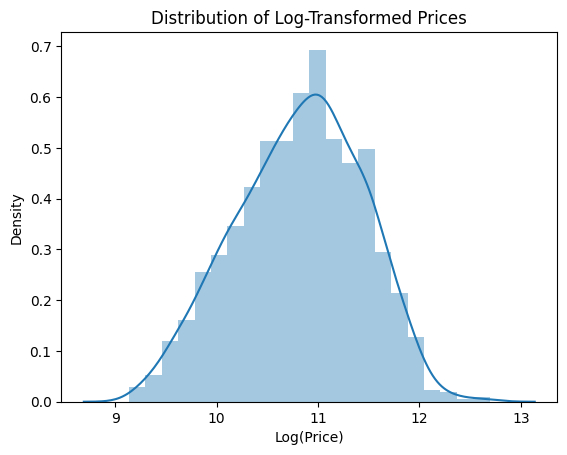

In [ ]:
# Since our target column(Price) is skewed,so it can disturb machine learning algorithm therefore we will make it normal by applying log transformation.
# we did this also bcz our R2 score increased by 5%.
# During the prediction we will do opposite of log i.e. exponential.

sns.distplot(np.log(df['Price']))
plt.title('Distribution of Log-Transformed Prices')
plt.xlabel('Log(Price)')
plt.ylabel('Density')
plt.show()

In [97]:
x = df.drop(columns=['Price'])
y = np.log(df['Price'])

In [98]:
x

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [99]:
y

,Price
0,11.175755
1,10.776777
2,10.329931
3,11.814476
4,11.473101
...,...
1298,10.433899
1299,11.288115
1300,9.409283
1301,10.614129


In [100]:
df

,Company,TypeName,Ram,Weight,Price,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
0,Apple,Ultrabook,8,1.37,71378.6832,0,1,226.983005,Intel Core i5,0,128,Intel,Mac
1,Apple,Ultrabook,8,1.34,47895.5232,0,0,127.677940,Intel Core i5,0,0,Intel,Mac
2,HP,Notebook,8,1.86,30636.0000,0,0,141.211998,Intel Core i5,0,256,Intel,Others/No OS/Linux
3,Apple,Ultrabook,16,1.83,135195.3360,0,1,220.534624,Intel Core i7,0,512,AMD,Mac
4,Apple,Ultrabook,8,1.37,96095.8080,0,1,226.983005,Intel Core i5,0,256,Intel,Mac
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1298,Lenovo,2 in 1 Convertible,4,1.80,33992.6400,1,1,157.350512,Intel Core i7,0,128,Intel,Windows
1299,Lenovo,2 in 1 Convertible,16,1.30,79866.7200,1,1,276.053530,Intel Core i7,0,512,Intel,Windows
1300,Lenovo,Notebook,2,1.50,12201.1200,0,0,111.935204,Other Intel Processor,0,0,Intel,Windows
1301,HP,Notebook,6,2.19,40705.9200,0,0,100.454670,Intel Core i7,1000,0,AMD,Windows


In [101]:
# Assuming you stored the original 'price' before scaling
price_std = df['Price'].std()

In [102]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=2)

In [103]:
X_train

,Company,TypeName,Ram,Weight,Touchscreen,IPS,PPI,Cpu brand,HDD,SSD,Gpu brand,OS
91,Acer,Notebook,8,2.20,0,0,141.211998,Intel Core i7,1000,0,Nvidia,Windows
863,Lenovo,Gaming,8,2.50,0,1,141.211998,Intel Core i5,1000,0,Nvidia,Others/No OS/Linux
552,Dell,Gaming,16,4.42,0,1,127.335675,Intel Core i7,1000,256,Nvidia,Windows
967,HP,Notebook,4,2.04,0,0,141.211998,Intel Core i3,500,0,Intel,Windows
365,HP,Notebook,8,2.04,0,0,100.454670,Other Intel Processor,2000,0,Intel,Windows
...,...,...,...,...,...,...,...,...,...,...,...,...
466,Acer,Notebook,4,2.20,0,0,100.454670,Intel Core i3,500,0,Nvidia,Windows
299,Asus,Ultrabook,16,1.63,0,0,141.211998,Intel Core i7,0,512,Nvidia,Windows
493,Acer,Notebook,8,2.20,0,0,100.454670,AMD Processor,1000,0,AMD,Windows
527,Lenovo,Notebook,8,2.20,0,0,100.454670,Intel Core i3,2000,0,Nvidia,Others/No OS/Linux


# we can do also scaling, feature selection, grid search CV to get more precise R2 score and MAE.

In [104]:
# To handle the categorical columns we have to apply one hot encoding(OHE), so we will use
# column transformer along with the scikit learn pipeline.

from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error, median_absolute_error

In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

In [106]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1302 entries, 0 to 1302
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Company      1302 non-null   object 
 1   TypeName     1302 non-null   object 
 2   Ram          1302 non-null   int32  
 3   Weight       1302 non-null   float32
 4   Price        1302 non-null   float64
 5   Touchscreen  1302 non-null   int64  
 6   IPS          1302 non-null   int64  
 7   PPI          1302 non-null   float64
 8   Cpu brand    1302 non-null   object 
 9   HDD          1302 non-null   int64  
 10  SSD          1302 non-null   int64  
 11  Gpu brand    1302 non-null   object 
 12  OS           1302 non-null   object 
dtypes: float32(1), float64(2), int32(1), int64(4), object(5)
memory usage: 132.2+ KB


In [107]:
handle_unknown='ignore'

### **Linear Regression**

In [114]:
step1 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand','Touchscreen', 'IPS', 'OS','Gpu brand']),
    ('scaler', StandardScaler(), ['PPI','Ram', 'Weight','HDD','SSD' ])
], remainder='passthrough')
                              # Leave the other columns (like categorical) unchanged
step2 = LinearRegression()

lr_pipeline = Pipeline([
    ('step1',step1),
    ('step2',step2)
])
lr_pipeline.fit(X_train,y_train)

y_pred = lr_pipeline.predict(X_test)

r2 = r2_score(y_test, y_pred)

# Calculating Adjusted R-squared
n = X_test.shape[0]           # number of samples
p = X_test.shape[1]           # number of features
adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# Calculating MSE & (RMSE)
LR_MSE = mean_squared_error(y_test, y_pred)
LR_RMSE = np.sqrt(LR_MSE)

print('R2 score:',r2)
print('MAE:',mean_absolute_error(y_test,y_pred))
print('Adjusted R2 score:', adj_r2)
print('MSE:', LR_MSE)
print('RMSE:', LR_RMSE)

R2 score: 0.8002405966122872
MAE: 0.20453995815621326
Adjusted R2 score: 0.7905748190290107
MSE: 0.07104182783129404
RMSE: 0.26653672885982155


In [115]:
# Mean of original target variable (before log transform)
mean_price = df['Price'].mean()
print(mean_price)

# Convert to original scale
LR_MSE_original = (np.exp(LR_MSE) - 1) * (mean_price ** 2)
LR_RMSE_original = np.sqrt(LR_MSE_original)

print(f"MSE in original price units: {LR_MSE_original:.5f}")
print(f"RMSE in original price units: {LR_RMSE_original:.5f}")

59889.05867281105
MSE in original price units: 264074801.06266
RMSE in original price units: 16250.37849


Text(0.5, 1.0, 'Residuals vs. Fitted Values (Linear Regression)')

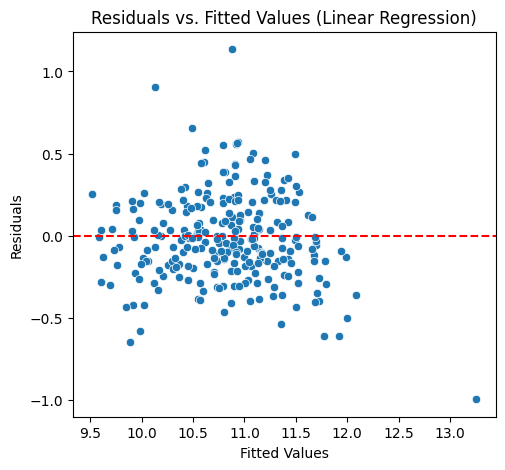

In [116]:
# Check Homoscedasticity of errors

residuals_lr = y_test - y_pred
fitted_values_lr = y_pred

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.scatterplot(x=fitted_values_lr, y=residuals_lr)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs. Fitted Values (Linear Regression)")

X-axis: Predicted (fitted) values from the regression model.

Y-axis: Residuals (errors) = Actual value − Predicted value.

The red dashed line is the zero line (ideal residual mean).

* The variance of errors appears to be constant — a key assumption of linear regression is not violated here.

**If the plot showed:**

* A funnel shape (residuals spreading out or shrinking as fitted values increase) → this would indicate heteroscedasticity.

* A curve or trend → might indicate non-linearity.

* Outliers that are far from the red line → may need to be addressed.

In [118]:
from statsmodels.stats.diagnostic import het_breuschpagan
import statsmodels.api as sm

# Step 1: Transform X_train using the pipeline step
X_transformed = lr_pipeline.named_steps['step1'].transform(X_train)  # replace 'step1' with actual step name (e.g., 'preprocessor')

# Step 2: Predict and calculate residuals
y_pred = lr_pipeline.predict(X_train)
residuals_lr = y_train - y_pred

# Step 3: Add constant to transformed X for Breusch-Pagan test
X_train_sm = sm.add_constant(X_transformed)

# Step 4: Perform Breusch-Pagan test
bp_test = het_breuschpagan(residuals_lr, X_train_sm)
bp_stat, bp_pvalue, f_stat, f_pvalue = bp_test

# Step 5: Print results
print(f'Breusch-Pagan Test Statistic: {bp_stat}')
print(f'p-value: {bp_pvalue}')
print(f'F-statistic: {f_stat}')
print(f'F p-value: {f_pvalue}')

if f_pvalue > 0.05:
    print("Residuals have constant variance (Homoscedasticity).")
else:
    print("Residuals do not have constant variance (Heteroscedasticity).")

Breusch-Pagan Test Statistic: 152.65720969665622
p-value: 1.1157023995257511e-15
F-statistic: 4.6583910953180485
F p-value: 1.5333313634234717e-17
Residuals do not have constant variance (Heteroscedasticity).


In [119]:
print(X_train_sm.shape, residuals_lr.shape)

(1041, 39) (1041,)


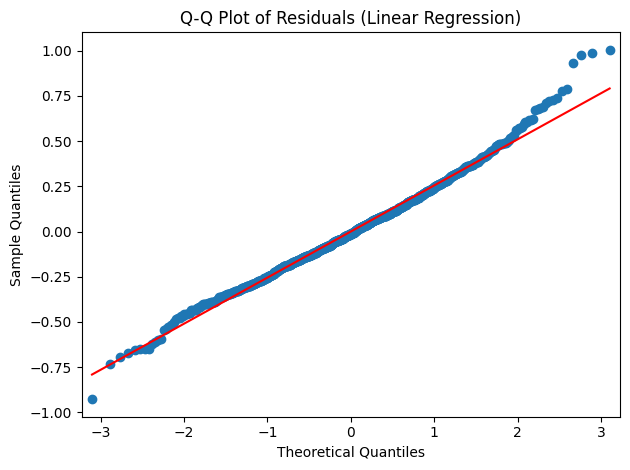

In [120]:
# and Normality of Errors

sm.qqplot(residuals_lr, line='s')
plt.title("Q-Q Plot of Residuals (Linear Regression)")
plt.tight_layout()
plt.show()

1.) X-axis: Theoretical quantiles from a normal distribution (what the residuals should look like if they were normal).

2.) Y-axis: Actual quantiles from your residuals (sample data).

3.) Red line: Ideal line if residuals follow a perfect normal distribution.

4.) Blue dots: Actual residual quantiles from your model.

**Interpretation:**
* The points lie fairly close to the red line, especially in the middle range of the data.

* There are small deviations at the tails (ends) — a few points at both ends curve away from the line.

***This means:***

🔹 The residuals are approximately normally distributed, which satisfies another key assumption of linear regression.

🔹 The slight curvature at the ends suggests minor skewness or a few outliers, but nothing major.

What Would Be a Problem?
* If points deviate strongly from the red line (especially forming an S-shape or bow), then residuals are not normally distributed.

* This could affect confidence intervals and p-values from the model.



In [121]:
from scipy.stats import shapiro

stat, p = shapiro(residuals_lr)
print('Shapiro-Wilk Test Statistic =', stat)
print('p-value =', p)

if p > 0.05:
    print(" residuals likely follow normal distribution.")
else:
    print("residuals are not normally distributed.")

Shapiro-Wilk Test Statistic = 0.991235955778302
p-value = 7.3983914989698845e-06
residuals are not normally distributed.


/tmp/ipython-input-2791747407.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(residuals_lr)


<Axes: xlabel='Price', ylabel='Density'>

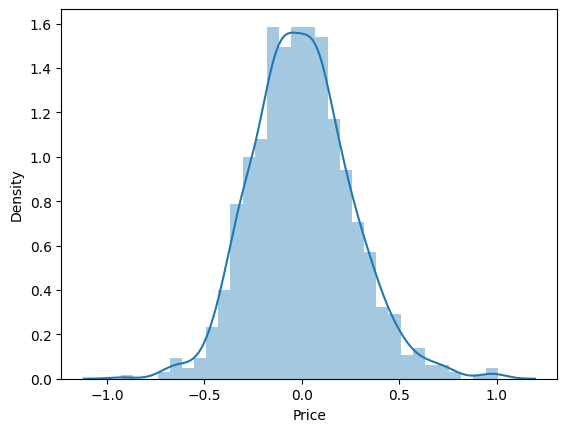

In [122]:
sns.distplot(residuals_lr)

<Figure size 1000x500 with 0 Axes>

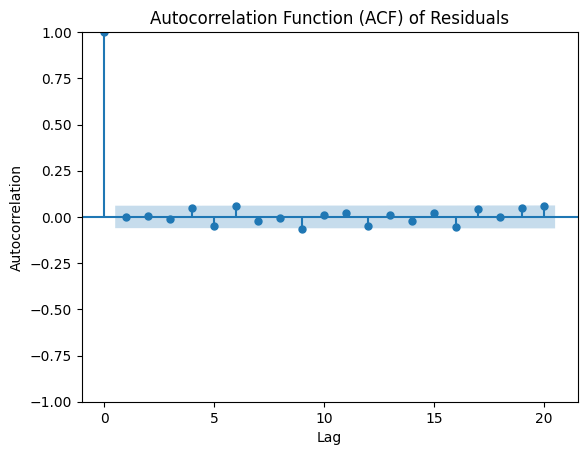

In [123]:
# 2. Autocorrelation Function (ACF) Plot
# The ACF plot shows the correlation between the residuals at different lags.
# Significant spikes outside the confidence interval (shaded area) indicate potential autocorrelation.
plt.figure(figsize=(10, 5))
sm.graphics.tsa.plot_acf(residuals_lr, lags=20, alpha=0.05)    # Adjust 'lags' as needed
plt.title("Autocorrelation Function (ACF) of Residuals")
plt.xlabel("Lag")
plt.ylabel("Autocorrelation")
plt.show()

In [124]:
# Durbin Watson Test

from statsmodels.stats.stattools import durbin_watson

# Run Durbin-Watson test
dw_stat = durbin_watson(residuals_lr)

print(f'Durbin-Watson statistic: {dw_stat}')

Durbin-Watson statistic: 2.0025965336089726


**dw_stat ≈ 2, we can confirm the assumption of independent errors.**

Test Statistic Range: 0 to 4

* dw_stat ~ 2 → No autocorrelation

* dw_stat < 2 → Positive autocorrelation

* dw_stat > 2 → Negative autocorrelation



In [125]:
# 4. Ljung-Box Test
# The Ljung-Box test is a statistical test for autocorrelation in the residuals.
# It tests the null hypothesis that there is no autocorrelation up to a certain number of lags.
# A small p-value (typically < 0.05) suggests that we reject the null hypothesis,
# indicating significant autocorrelation.

from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals_lr, lags=[10], return_df=True) # Test for autocorrelation up to 10 lags
print("\nLjung-Box Test for Autocorrelation:")
print(lb_test)

# Interpretation of Ljung-Box Test Output:
# - lb_Q: The Ljung-Box test statistic.
# - lb_pvalue: The p-value of the Ljung-Box test.

if lb_test['lb_pvalue'].iloc[0] < 0.05:
    print("The Ljung-Box test suggests significant autocorrelation in the residuals.")
else:
    print("The Ljung-Box test does not suggest significant autocorrelation in the residuals.")


Ljung-Box Test for Autocorrelation:
      lb_stat  lb_pvalue
10  13.247674   0.210152
The Ljung-Box test does not suggest significant autocorrelation in the residuals.


In [126]:
# Further analysis: You can test for different numbers of lags in the Ljung-Box test.

lb_test_multiple_lags = acorr_ljungbox(residuals_lr, lags=range(1, 11), return_df=True)
print("\nLjung-Box Test for Autocorrelation (Multiple Lags):")
print(lb_test_multiple_lags)


Ljung-Box Test for Autocorrelation (Multiple Lags):
      lb_stat  lb_pvalue
1    0.003972   0.949745
2    0.028464   0.985869
3    0.198501   0.977831
4    2.547345   0.636178
5    4.884484   0.430140
6    8.307827   0.216407
7    8.721064   0.273308
8    8.754372   0.363439
9   13.176201   0.154794
10  13.247674   0.210152


In [127]:
# Cross-validation for Linear Regression (to check overfitting)

from sklearn.model_selection import cross_val_score, KFold
cv = KFold(n_splits=10, shuffle=True, random_state=42)               # k = 10-Fold CV (most used in practice), Lower bias and good stability

cv_scores_lr = cross_val_score(lr_pipeline, x, y, cv=cv, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores (Linear Regression): {-cv_scores_lr}")
LR_MSE_mean = cv_scores_lr.mean()
print(f"Mean Cross-validation MSE (Linear Regression): {-LR_MSE_mean:.5f}")

Cross-validation MSE scores (Linear Regression): [0.07626149 0.07280711 0.0842564  0.06966376 0.06360078 0.05764578
 0.06132529 0.05868321 0.0878914  0.06648744]
Mean Cross-validation MSE (Linear Regression): 0.06986


In [128]:
# Convert to original scale
LR_MSE_CV = (np.exp(-LR_MSE_mean) - 1) * (mean_price ** 2)
LR_RMSE_CV = np.sqrt(LR_MSE_CV)

print(f"MSE in original price units: {LR_MSE_CV:.5f}")
print(f"RMSE in original price units: {LR_RMSE_CV:.5f}")

MSE in original price units: 259535252.07419
RMSE in original price units: 16110.09783


### **Decision Tree**

In [153]:
# ---------------- Preprocessing ----------------
step3 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'),
    ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
    ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'Weight'])
], remainder='passthrough')

# ---------------- Model ----------------
step4 = DecisionTreeRegressor(random_state=42, criterion='squared_error')

dt_pipeline = Pipeline([
    ('step3',step3),
    ('step4',step4)
])

# ---------------- Hyperparameter Grid ----------------
param_grid = {
    'step4__max_depth': [1, 5, 10, 12, 15],
    'step4__min_samples_split': [5, 10, 15, 20],
    'step4__min_samples_leaf': [1, 2, 4, 6, 8]
}

# ---------------- GridSearch ----------------
grid_search = GridSearchCV(estimator=dt_pipeline,
                           param_grid=param_grid,
                           cv=5,
                           scoring='r2',
                           n_jobs=-1,
                           verbose=1)

grid_search.fit(X_train, y_train)

# ---------------- Best Model ----------------
best_dt_model = grid_search.best_estimator_

# ---------------- Prediction ----------------
y_pred_dt = best_dt_model.predict(X_test)

# ---------------- Evaluation ----------------
r2_dt = r2_score(y_test, y_pred_dt)
mae_dt = mean_absolute_error(y_test, y_pred_dt)
mse_dt = mean_squared_error(y_test, y_pred_dt)
rmse_dt = np.sqrt(mse)
medae_dt = median_absolute_error(y_test, y_pred_dt)

print("Best Parameters:", grid_search.best_params_)
print("R2 score:", r2_dt)
print("MAE:", mae_dt)
print("MSE:", mse_dt)
print("RMSE:", rmse_dt)
print("Median Absolute Error:", medae_dt)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
Best Parameters: {'step4__max_depth': 12, 'step4__min_samples_leaf': 2, 'step4__min_samples_split': 20}
R2 score: 0.8064786578868535
MAE: 0.19838946664642382
MSE: 0.06882334265586192
RMSE: 0.2072850301937133
Median Absolute Error: 0.15112039204264782


In [154]:
# Cross-validation on BEST Decision Tree model (to check overfitting)

cv_scores_dt = cross_val_score(best_dt_model, x, y, cv=cv, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores (Decision Tree): {-cv_scores_dt}")
DT_MSE_mean = cv_scores_dt.mean()
print(f"Mean Cross-validation MSE (Decision Tree): {-DT_MSE_mean:.5f}")

Cross-validation MSE scores (Decision Tree): [0.06614766 0.06453514 0.06304127 0.08807617 0.06107406 0.0480426
 0.05979386 0.06059829 0.09149858 0.07074414]
Mean Cross-validation MSE (Decision Tree): 0.06736


In [155]:
# Convert to original scale
DT_MSE_CV = (np.exp(-DT_MSE_mean) - 1) * (mean_price ** 2)
DT_RMSE_CV = np.sqrt(DT_MSE_CV)

print(f"MSE in original price units: {DT_MSE_CV:.5f}")
print(f"RMSE in original price units: {DT_RMSE_CV:.5f}")

MSE in original price units: 249904478.21638
RMSE in original price units: 15808.36735


### **Random Forest**

In [161]:
# ---------------- Preprocessing ----------------
step5 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'),
     ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
    ('scaler', StandardScaler(),
     ['PPI','Ram','HDD','SSD', 'Weight'])
], remainder='passthrough')

# ---------------- Model ----------------
step6 = RandomForestRegressor(
    random_state=42,
    criterion='squared_error',
    n_jobs=-1
)

rf_pipeline = Pipeline([
    ('step5', step5),
    ('step6', step6)
])

# ---------------- Hyperparameter Grid ----------------
param_grid_rf = {
    'step6__n_estimators': [100, 300, 500],
    'step6__max_depth': [None, 3, 5],
    'step6__min_samples_split': [2, 5, 10],
    'step6__min_samples_leaf': [1, 2, 5],
    'step6__max_features': ['sqrt', 'log2', 0.75]
}

# ---------------- GridSearch ----------------
grid_search_rf = GridSearchCV(
    estimator=rf_pipeline,
    param_grid=param_grid_rf,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search_rf.fit(X_train, y_train)

# ---------------- Best Model ----------------
best_rf_model = grid_search_rf.best_estimator_

# ---------------- Prediction ----------------
y_pred_rf = best_rf_model.predict(X_test)

# ---------------- Evaluation ----------------
r2_rf = r2_score(y_test, y_pred_rf)
mae_rf = mean_absolute_error(y_test, y_pred_rf)
mse_rf = mean_squared_error(y_test, y_pred_rf)
rmse_rf = np.sqrt(mse_rf)
medae_rf = median_absolute_error(y_test, y_pred_rf)

print("Best Parameters:", grid_search_rf.best_params_)
print("R2 score:", r2_rf)
print("MAE:", mae_rf)
print("MSE:", mse_rf)
print("RMSE:", rmse_rf)
print("Median Absolute Error:", medae_rf)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
Best Parameters: {'step6__max_depth': None, 'step6__max_features': 0.75, 'step6__min_samples_leaf': 1, 'step6__min_samples_split': 2, 'step6__n_estimators': 300}
R2 score: 0.8673469208265919
MAE: 0.16037462778110323
MSE: 0.04717633839563189
RMSE: 0.21720114731656434
Median Absolute Error: 0.1320208395346789


In [162]:
# Cross-validation on BEST Decision Tree model (to check overfitting)

cv_scores_rf = cross_val_score(best_rf_model, x, y, cv=cv, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores (Random Forest): {-cv_scores_rf}")
RF_MSE_mean = cv_scores_rf.mean()
print(f"Mean Cross-validation MSE (Random Forest): {-RF_MSE_mean:.5f}")

Cross-validation MSE scores (Random Forest): [0.05370694 0.04303172 0.04458593 0.04513481 0.04046376 0.03215027
 0.0383213  0.04061447 0.05690453 0.05043464]
Mean Cross-validation MSE (Random Forest): 0.04453


In [142]:
# Convert to original scale
RF_MSE_CV = (np.exp(-RF_MSE_mean) - 1) * (mean_price ** 2)
RF_RMSE_CV = np.sqrt(RF_MSE_CV)

print(f"MSE in original price units: {RF_MSE_CV:.5f}")
print(f"RMSE in original price units: {RF_RMSE_CV:.5f}")

MSE in original price units: 163343304.18634
RMSE in original price units: 12780.58309


### **SVM**

In [169]:
# ---------------- Preprocessing ----------------
step7 = ColumnTransformer(transformers=[
    ('ohe', OneHotEncoder(sparse_output=False, drop='first'),
     ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
    ('scaler', StandardScaler(),
     ['PPI','Ram','HDD','SSD', 'Weight'])
], remainder='passthrough')

# ---------------- Model ----------------
step8 = SVR()

svm_pipeline = Pipeline([
    ('step7', step7),
    ('step8', step8)
])

# ---------------- Hyperparameter Grid ----------------
param_grid = {
    'step8__kernel': ['rbf', 'linear'],
    'step8__C': [0.1, 1, 10, 100],
    'step8__epsilon': [0.01, 0.1, 0.2],
    'step8__gamma': ['scale', 'auto']
}

# ---------------- GridSearch ----------------
grid_search = GridSearchCV(
    estimator=svm_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    verbose=1
)

grid_search.fit(X_train, y_train)

# ---------------- Best Model ----------------
best_svm_model = grid_search.best_estimator_

# ---------------- Prediction ----------------
y_pred_svm = best_svm_model.predict(X_test)

# ---------------- Evaluation ----------------
r2_svm = r2_score(y_test, y_pred_svm)
mae_svm = mean_absolute_error(y_test, y_pred_svm)
mse_svm = mean_squared_error(y_test, y_pred_svm)
rmse_svm = np.sqrt(mse)
medae_svm = median_absolute_error(y_test, y_pred_svm)

print("Best Parameters:", grid_search.best_params_)
print("R2 score:", r2_svm)
print("MAE:", mae_svm)
print("MSE:", mse_svm)
print("RMSE:", rmse_svm)
print("Median Absolute Error:", medae_svm)

Fitting 5 folds for each of 48 candidates, totalling 240 fits
Best Parameters: {'step8__C': 10, 'step8__epsilon': 0.1, 'step8__gamma': 'auto', 'step8__kernel': 'rbf'}
R2 score: 0.8791827395815879
MAE: 0.1611518083917714
MSE: 0.04296708374240864
RMSE: 0.2072850301937133
Median Absolute Error: 0.12346732949015582


In [171]:
# Cross-validation
cv_scores_svm = cross_val_score(best_svm_model, x, y, cv=cv, scoring='neg_mean_squared_error')
print(f"Cross-validation MSE scores (SVM): {-cv_scores_svm}")
SVM_MSE_mean = cv_scores_svm.mean()
print(f"Mean Cross-validation MSE (SVM): {-SVM_MSE_mean:.5f}")

Cross-validation MSE scores (SVM): [0.04800014 0.04860958 0.04612749 0.04760562 0.04133053 0.03590716
 0.03403464 0.04498801 0.05781769 0.04526854]
Mean Cross-validation MSE (SVM): 0.04497


In [172]:
# Convert to original scale
SVM_MSE_CV = (np.exp(-SVM_MSE_mean) - 1) * (mean_price ** 2)
SVM_RMSE_CV = np.sqrt(SVM_MSE_CV)

print(f"MSE in original price units: {SVM_MSE_CV:.5f}")
print(f"RMSE in original price units: {SVM_RMSE_CV:.5f}")

MSE in original price units: 164971572.25775
RMSE in original price units: 12844.12598


### **Model Comparision**

In [173]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

results = pd.DataFrame({
    "Model": ["Decision Tree", "Random Forest", "SVM"],
    "R²": [r2_dt, r2_rf, r2_svm],
    "MAE": [mae_dt, mae_rf, mae_svm],
    "RMSE": [rmse_dt, rmse_rf, rmse_svm],
    "MedAE": [medae_dt, medae_rf, medae_svm],
    "MAPE (%)": [
        mean_absolute_percentage_error(y_test, y_pred_dt),
        mean_absolute_percentage_error(y_test, y_pred_rf),
        mean_absolute_percentage_error(y_test, y_pred_svm),
    ]
})

results = results.sort_values(by="MAPE (%)")

In [167]:
print("\nModel Comparison with MAPE and MedAE:")
results


Model Comparison with MAPE and MedAE:


,Model,R²,MAE,RMSE,MedAE,MAPE (%)
1,Random Forest,0.867347,0.160375,0.217201,0.132021,1.485315
2,SVM,0.879183,0.161152,0.207285,0.123467,1.488680
0,Decision Tree,0.806479,0.198389,0.207285,0.151120,1.838442


In [2]:
# # KNN

# step7 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'Weight'])
# ], remainder='passthrough')

# step8 = KNeighborsRegressor(n_neighbors=13)

# knn_pipeline = Pipeline([
#     ('step7',step7),
#     ('step8',step8)
# ])
# knn_pipeline.fit(X_train,y_train)

# y_pred = knn_pipeline.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# KNN_MSE = mean_squared_error(y_test, y_pred)
# KNN_RMSE = np.sqrt(KNN_MSE)

# print('R2 score:',r2)                                 # .7906
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .2034
# print('Adjusted R2 score:', adj_r2)                   # .7769
# print('MSE:', KNN_MSE)                                    # .0800
# print('RMSE:', KNN_RMSE)                                  # .2829

In [3]:
# # KNN

# # Define the preprocessing steps
# preprocessor = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first', handle_unknown='ignore'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'Weight'])
# ], remainder='passthrough')

# # Initialize the KNN regressor (the number of neighbors will be set later)
# knn = KNeighborsRegressor()

# # Create the pipeline
# knn_pipeline = Pipeline(steps=[
#     ('preprocessor', preprocessor),
#     ('knn', knn)
# ])

# # Determine the optimal number of neighbors using cross-validation
# k_values = range(1, 31)
# cv_scores = []

# for k in k_values:
#     knn_pipeline.set_params(knn__n_neighbors=k)
#     scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     cv_scores.append(-scores.mean())

# # Identify the optimal k
# optimal_k = k_values[np.argmin(cv_scores)]
# print(f"Optimal k: {optimal_k}")

# # Set the optimal number of neighbors in the pipeline
# knn_pipeline.set_params(knn__n_neighbors=optimal_k)

# # Train the model on the training data
# knn_pipeline.fit(X_train, y_train)

# # Predict on the test data
# y_pred = knn_pipeline.predict(X_test)

# # Calculate evaluation metrics
# r2 = r2_score(y_test, y_pred)
# n = X_test.shape[0]  # Number of samples
# p = X_test.shape[1]  # Number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)
# mae = mean_absolute_error(y_test, y_pred)

# # Print evaluation metrics
# print(f"R² Score: {r2:.4f}")
# print(f"Adjusted R² Score: {adj_r2:.4f}")
# print(f"Mean Absolute Error (MAE): {mae:.2f}")
# print(f"Mean Squared Error (MSE): {mse:.2f}")
# print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

In [4]:
# k_values = range(1, 31)
# cv_scores = []

# # Perform cross-validation for each k
# for k in k_values:
#     knn_pipeline.set_params(knn__n_neighbors=k)
#     # Use negative mean squared error as the scoring metric
#     scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     # Append the mean of the negative MSE scores
#     cv_scores.append(-scores.mean())

# # Plot the results
# plt.figure(figsize=(10, 6))
# plt.plot(k_values, cv_scores, marker='o')
# plt.title('Elbow Method for Optimal k in KNN Regression')
# plt.xlabel('Number of Neighbors (k)')
# plt.ylabel('Mean Squared Error')
# plt.xticks(k_values)
# plt.grid(True)
# plt.show()

# # Identify the optimal k
# optimal_k = k_values[np.argmin(cv_scores)]
# print(f"Optimal k: {optimal_k}")

In [5]:
# import numpy as np
# import pandas as pd
# from sklearn.pipeline import Pipeline
# from sklearn.compose import ColumnTransformer
# from sklearn.preprocessing import OneHotEncoder, StandardScaler
# from sklearn.neighbors import KNeighborsRegressor
# from sklearn.model_selection import cross_val_score, train_test_split
# from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# # Assuming 'df' is your DataFrame and 'Price' is the target variable
# # Replace 'df' with your actual DataFrame variable
# X = df.drop('Price', axis=1)
# y = df['Price']

# # Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# # Define categorical and numerical features
# categorical_features = ['Company', 'TypeName', 'Cpu brand', 'OS', 'Gpu brand', 'IPS', 'Touchscreen']
# numerical_features = ['PPI', 'Ram', 'HDD', 'SSD', 'Weight']

# # Create the preprocessing pipeline
# step7 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'Weight'])
# ], remainder='passthrough')

# # Initialize the KNN regressor
# step8 = KNeighborsRegressor()

# # Create the full pipeline
# knn_pipeline = Pipeline([
#     ('step7',step7),
#     ('step8',step8)
# ])

# # Determine the optimal number of neighbors (k) using cross-validation
# k_values = range(1, 31)
# cv_scores = []

# for k in k_values:
#     knn_pipeline.set_params(knn__n_neighbors=k)
#     scores = cross_val_score(knn_pipeline, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#     cv_scores.append(-scores.mean())

# # Identify the optimal k
# optimal_k = k_values[np.argmin(cv_scores)]
# print(f"Optimal k: {optimal_k}")

# # Update the pipeline with the optimal k
# knn_pipeline.set_params(knn__n_neighbors=optimal_k)

# # Fit the pipeline on the training data
# knn_pipeline.fit(X_train, y_train)

# # Predict on the test data
# y_pred = knn_pipeline.predict(X_test)

# # Calculate performance metrics
# r2 = r2_score(y_test, y_pred)
# mae = mean_absolute_error(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# rmse = np.sqrt(mse)

# # Calculate Adjusted R-squared
# n = X_test.shape[0]  # number of samples
# p = X_test.shape[1]  # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Display the results
# print(f"R2 score: {r2}")
# print(f"Adjusted R2 score: {adj_r2}")
# print(f"Mean Absolute Error (MAE): {mae}")
# print(f"Mean Squared Error (MSE): {mse}")
# print(f"Root Mean Squared Error (RMSE): {rmse}")


In [6]:
# # Cross-validation for KNN (to check overfitting)
# cv_scores_knn = cross_val_score(knn_pipeline, x, y, cv=cv, scoring='neg_mean_squared_error')
# print(f"Cross-validation MSE scores (KNN): {-cv_scores_knn}")
# KNN_MSE_mean = cv_scores_knn.mean()
# print(f"Mean Cross-validation MSE (Linear Regression): {-KNN_MSE_mean:.5f}")

In [7]:
# # Convert to original scale
# KNN_MSE_CV = (np.exp(-KNN_MSE_mean) - 1) * (mean_price ** 2)
# KNN_RMSE_CV = np.sqrt(KNN_MSE_CV)

# print(f"MSE in original price units: {KNN_MSE_CV:.5f}")
# print(f"RMSE in original price units: {KNN_RMSE_CV:.5f}")

In [8]:
# # ExtraTrees (Variation Of Random Forest)

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'IPS', 'Weight', 'Touchscreen'])
# ], remainder='passthrough')

# step3 = ExtraTreesRegressor(bootstrap=True,n_estimators=2000,
#                               random_state=6,
#                               max_samples=0.5,
#                               max_features=0.75,
#                               max_depth=10)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8850
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .1615
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)

In [9]:
# # Ridge Regression


# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand', 'IPS','Touchscreen']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'Weight'])
# ], remainder='passthrough')

# step2 = Ridge(alpha=15)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step2',step2)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8127
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .2092
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)

In [10]:
# # Lasso Regression

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'IPS','OS','Gpu brand', 'Touchscreen']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'Weight',])
# ], remainder='passthrough')

# step3 = Lasso(alpha=0.0007)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8071
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .2111
# print('Adjusted R2 score:', adj_r2)                   # .79
# print('MSE:', MSE)                                    # .0737
# print('RMSE:', RMSE)

In [11]:
# # AdaBoost

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'IPS', 'Weight', 'Touchscreen'])
# ], remainder='passthrough')

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]

#       # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8006
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .2287
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)

In [12]:
# # Gradient Boost

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'IPS', 'Weight', 'Touchscreen'])
# ], remainder='passthrough')


# step3 = GradientBoostingRegressor(n_estimators=300)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8824
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .1594
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)

In [13]:
# # XgBoost

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'IPS', 'Weight', 'Touchscreen'])
# ], remainder='passthrough')


# step3 = XGBRegressor(n_estimators=70,max_depth=5,learning_rate=0.25)

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8771
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .1626
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)

In [14]:
# # Voting Regressor

# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'IPS', 'Weight', 'Touchscreen'])
# ], remainder='passthrough')

# rf = RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)
# gbdt = GradientBoostingRegressor(n_estimators=100,max_features=0.5)
# xgb = XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5)
# et = ExtraTreesRegressor(n_estimators=100,random_state=3,max_samples=0.5,max_features=0.75,max_depth=10,bootstrap=True)

# step3 = VotingRegressor([('rf', rf), ('gbdt', gbdt), ('xgb',xgb), ('et',et)],weights=[5,1,1,1])

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8899
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .1578
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)

In [15]:
# # Stacking

# from sklearn.ensemble import VotingRegressor,StackingRegressor

# step1 = ColumnTransformer(transformers=[
#     ('ohe', OneHotEncoder(sparse_output=False, drop='first'), ['Company', 'TypeName','Cpu brand', 'OS','Gpu brand']),
#     ('scaler', StandardScaler(), ['PPI','Ram','HDD','SSD', 'IPS', 'Weight', 'Touchscreen'])
# ], remainder='passthrough')

# estimators = [
#     ('rf', RandomForestRegressor(n_estimators=350,random_state=3,max_samples=0.5,max_features=0.75,max_depth=15)),
#     ('gbdt',GradientBoostingRegressor(n_estimators=100,max_features=0.5)),
#     ('xgb', XGBRegressor(n_estimators=25,learning_rate=0.3,max_depth=5))
# ]

# step3 = StackingRegressor(estimators=estimators, final_estimator=Ridge(alpha=100))

# pipe = Pipeline([
#     ('step1',step1),
#     ('step3',step3)
# ])

# pipe.fit(X_train,y_train)

# y_pred = pipe.predict(X_test)

# r2 = r2_score(y_test, y_pred)

# # Calculating Adjusted R-squared
# n = X_test.shape[0]           # number of samples
# p = X_test.shape[1]           # number of features
# adj_r2 = 1 - (((1 - r2) * (n - 1)) / (n - p - 1))

# # Calculating MSE & (RMSE)
# MSE = mean_squared_error(y_test, y_pred)
# RMSE = np.sqrt(MSE)

# print('R2 score:',r2)                                 # .8785
# print('MAE:',mean_absolute_error(y_test,y_pred))      # .1670
# print('Adjusted R2 score:', adj_r2)                   # .
# print('MSE:', MSE)                                    # .
# print('RMSE:', RMSE)